<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-2linies.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
<p style="margin: 0; text-align:right;">2023-1 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PEC 3: Métodos supervisados

En esta práctica veremos diferentes métodos supervisados y trataremos de optimizar diferentes métricas. Veremos como los diferentes modelos clasifican los puntos y con cuales obtenemos mayor precisión. Después aplicaremos todo lo que hemos aprendido hasta ahora a un dataset nuevo simulando un caso práctico real.

1. [Exploración de algoritmos supervisados](#eje1) \
    1.0. Carga de datos \
    1.1. Naive-Bayes\
    1.2. Análisis Discriminante Lineal (LDA) y Análisis Discriminante Cuadrtático (QDA)\
    1.3. K vecinos más próximos (KNN)\
    1.4. Máquinas de soporte vectorial (SVM)\
    1.5. Árboles de decisión
2. [Implementación del caso práctico](#ej2)\
    2.0. Carga de datos\
    2.1. Análisis Exploratorio de Datos\
    2.2. Preprocesamiento de Datos\
    2.3. Modelización\
    2.4. Ajuste de Hiperparámetros


<u>Consideraciones generales</u>:

- La solución planteada no puede utilizar métodos, funciones o parámetros declarados **_deprecated_** en futuras versiones, a excepción de la carga de datos cómo se indica posteriormente.
- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

<u>Formato de la entrega</u>:

- Algunos ejercicios pueden suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.
- **Para una mayor visualización, se sugiere que el análisis se responda dentro de las celdas de color verde.**

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos:</strong> Gloria Manresa Santamaría
</div>

In [1]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import SMOTE
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE

<a id='ej1'></a>
# 1. Exploración de Algoritmos Supervisados (5 puntos)

## 1.0 Carga de Datos

Vamos a trabajar con el conjunto de datos "Spiral", un conjunto sintético ampliamente utilizado en el aprendizaje automático y la minería de datos para problemas de clasificación no lineales. Este conjunto se compone de dos espirales entrelazadas, similares a las espirales de Arquímedes, donde cada punto está uniformemente distribuido en el plano y etiquetado con una de dos clases.

Tu tarea en esta sección es aplicar un algoritmo de clasificación para predecir la clase de un punto desconocido basándote en sus coordenadas (x, y). Este desafío es interesante debido a la naturaleza no lineal de las espirales entrelazadas, lo que pone a prueba los algoritmos de aprendizaje automático.

Sigue estos pasos:

1. Utiliza el código provisto para cargar 2000 puntos en la variable `X` y sus correspondientes etiquetas o grupos (en forma numérica) en la variable `y`.
2. Confirma que la carga de datos ha sido exitosa. Para ello, verifica las dimensiones de `X` y `y`.
3. Visualiza el gráfico de los puntos, utilizando colores distintos para cada grupo, para tener una representación visual clara del conjunto de datos."

Dimensiones de X (2000, 2)
Dimensiones de y (2000,)


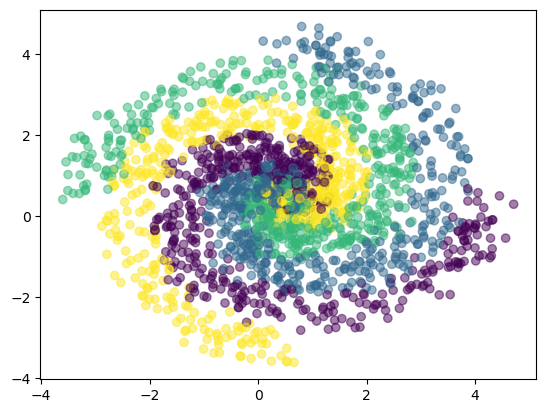

In [3]:
data = pd.read_pickle('spiral.pickle')

# Convertir las dos primeras columnas en un array de numpy
X = data[['X1', 'X2']].values

# Convertir la última columna en un array de numpy
y = data['y'].values

print('Dimensiones de X', X.shape)
print('Dimensiones de y', y.shape)

# Hacer la representación gráfica
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis, alpha=0.5)
plt.show()

A lo largo de los ejercicios, aprenderas a visualizar gráficamente las fronteras de decisión generadas por diferentes modelos. Para lograr esto, utilizaremos la función definida a continuación, que sigue los siguientes pasos:

1. Crea una [malla](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) (meshgrid) usando los valores mínimos y máximos de 'x' e 'y'.
2. Realiza predicciones del clasificador utilizando los valores de esta malla.
3. Redimensiona (_reshape_) los datos para que tengan el formato adecuado.

Una vez completados estos pasos, estaremos listos para generar el gráfico de las fronteras de decisión y superponer los puntos reales. Así, podremos observar las áreas que el modelo identifica como pertenecientes a una clase específica y aquellas que considera de otra. Al superponer los puntos reales, evaluaré cómo el modelo clasifica correctamente los puntos en las áreas correspondientes.

En general, visualizar las fronteras de decisión me proporcionará una comprensión visual del rendimiento del modelo.

In [4]:
def plot_decision_boundary(clf, X, Y, cmap='Paired'):
    if not isinstance(X, np.ndarray):  # Si X no es un array de numpy, lo convierte
        X = X.to_numpy()

    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k', label=Y);

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>

Divide el _dataset_ en dos subconjuntos: __*train*__ y __*test*__. Asigna el 80% de los datos al conjunto de entrenamiento (__*train*__) y el 20% al conjunto de prueba (__*test*__). Nombra los conjuntos como `X_train`, `X_test`, `y_train` y `y_test`, asegurándote de utilizar la opción `random_state = 24` para garantizar la reproducibilidad de los resultados.

Para realizar esta división, emplea la función `train_test_split` de la biblioteca `sklearn`.

Recuerda que es esencial dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Esta división es crucial para evaluar el rendimiento de tu modelo de manera efectiva y fiable. Así podrás entender cómo se comportará el modelo con datos nuevos y no vistos durante su entrenamiento.
    </div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [5]:
# Divide el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

## 1.1. Gaussian Naïve Bayes

El propósito de este primer ejercicio es comprender el funcionamiento del algoritmo Naïve-Bayes, un algoritmo peculiar que se basa en el teorema de Bayes para calcular la probabilidad de que una observación pertenezca a cada una de las clases. Este modelo asume que las características de entrada son independientes entre sí, lo que permite simplificar el cálculo de las probabilidades condicionales.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

1. **Entrena un Modelo de Naïve-Bayes:** Utiliza el conjunto de datos de _train_ para entrenar un modelo de Naïve-Bayes. Emplea el clasificador `GaussianNB` de la biblioteca `sklearn` para este fin.

2. **Calcula el _Accuracy_ del Modelo:** Una vez entrenado el modelo, calcula su precisión (_accuracy_) tanto en el conjunto de _train_ como en el de _test_. Esto te permitirá evaluar qué tan bien está funcionando tu modelo.

3. **Calcula la Matriz de Confusión:** Utiliza el conjunto de _test_ para calcular la matriz de confusión del modelo. Esta matriz te ayudará a entender de mejor manera los aciertos y errores de tu clasificador.

4. **Representa Gráficamente la Frontera de Decisión:** Finalmente, visualiza la frontera de decisión del modelo utilizando el conjunto de _test_. Puedes hacer esto con la ayuda de la función `plot_decision_boundary` que ya has creado previamente.

Para realizar estos cálculos y visualizaciones, utiliza las funciones `accuracy_score` y `confusion_matrix` del paquete `metrics` de `sklearn`.

</div>


<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Precisión en el conjunto de entrenamiento: 0.294375
Precisión en el conjunto de prueba: 0.2475


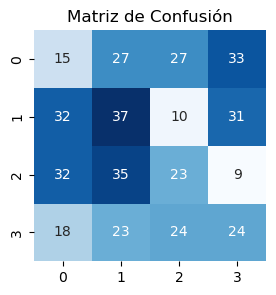

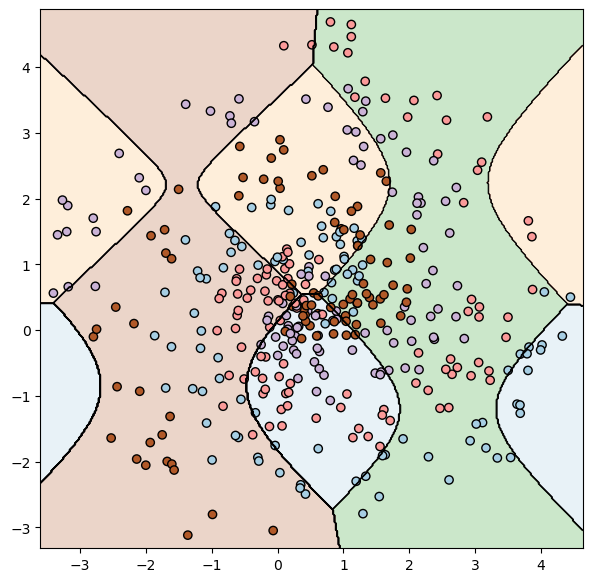

In [6]:
# Entrena un modelo de Naïve-Bayes
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Calcula la precisión en los conjuntos de entrenamiento y prueba
y_train_pred = naive_bayes_model.predict(X_train)
y_test_pred = naive_bayes_model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print('Precisión en el conjunto de entrenamiento:', accuracy_train)
print('Precisión en el conjunto de prueba:', accuracy_test)

# Calcula la matriz de confusión en el conjunto de test
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión')
plt.show()

# Visualiza la frontera de decisión
plot_decision_boundary(naive_bayes_model, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. **Analiza las Fronteras de Decisión:** Observa y describe cómo son las fronteras de decisión obtenidas. Reflexiona y responde: ¿Tiene sentido que las fronteras tengan esta forma considerando el algoritmo de Naïve-Bayes que has utilizado? Fundamenta tu respuesta con base en las características y suposiciones del algoritmo.

2. **Evalúa las Predicciones en el Conjunto de Test:** Examina cómo son las predicciones que el modelo ha realizado sobre el conjunto de test. Discute la efectividad del modelo y cualquier patrón o tendencia que observes en las predicciones. Considera aspectos como la precisión, la matriz de confusión, y cualquier otro factor relevante que hayas notado durante la implementación.
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

1. Las fronteras de decisión que podemos observar en el gráfico anterior tienen sentido debido al clasificador escogido: "Gaussian Naive Bayes" por lo que era de esperar que las fronteras de decisión siguieran una distribución gaussiana.

2. La precisión en ambos conjuntos (entrenamiento y prueba) es baja. La precisión en el conjunto de entrenamiento es 29.4%, mientras que en el conjunto de prueba es aún más baja, 24.75%. El modelo no está capturando de manera efectiva la complejidad de las espirales entrelazadas.

   La matriz de confusión confirma que el modelo está teniendo dificultades para asignar las clases correctamente. Observamos que existen confusiones significativas entre las clases, con números considerables de falsos positivos y falsos negativos. 


Recordamos que el modelo utilizado asume independencia de características y en nuestro caso hay una fuerte dependencia entre ellas ya que los puntos dependen entre ellos para formar las espirales.

Todo apunta a que este modelo no se adecua al conjunto de datos y habría que probar otros modelos más complejos y apropiados para este caso.

**Referencias:**

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

https://www.analyticsvidhya.com/blog/2021/11/implementation-of-gaussian-naive-bayes-in-python-sklearn/
   
</div>

### 1.2 Análisis Discriminante Lineal (LDA) y Análisis Discriminante Cuadrtático (QDA)

Ahora, analizarás dos algoritmos que se basan en la transformación lineal de las características de entrada para maximizar la separación entre las clases. Estos modelos operan bajo la suposición de que las características siguen una distribución gaussiana. Esto te permitirá calcular las probabilidades condicionales de cada clase. Con estos cálculos, asignarás a cada observación la clase que presente la mayor probabilidad condicional.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Sigue estos pasos con el dataset de entrenamiento (_train_):    
    
1. Entrena un modelo de Análisis Discriminante Lineal (LDA) utilizando el clasificador `LinearDiscriminantAnalysis` de `sklearn`.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.

Estas acciones te ayudarán a evaluar la eficacia del modelo LDA en tu conjunto de datos y a entender mejor cómo clasifica las observaciones.

</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Precisión en el conjunto de entrenamiento (LDA): 0.255
Precisión en el conjunto de prueba (LDA): 0.2475


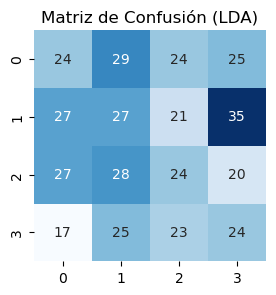

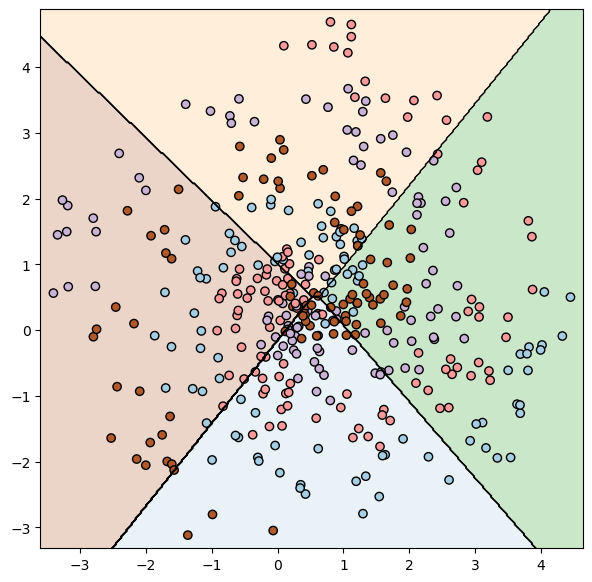

In [7]:
# Entrena un modelo de Análisis Discriminante Lineal (LDA)
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, y_train)

# Calcula la precisión en los conjuntos de entrenamiento y prueba
y_train_pred_lda = lda_model.predict(X_train)
y_test_pred_lda = lda_model.predict(X_test)

accuracy_train_lda = accuracy_score(y_train, y_train_pred_lda)
accuracy_test_lda = accuracy_score(y_test, y_test_pred_lda)

print('Precisión en el conjunto de entrenamiento (LDA):', accuracy_train_lda)
print('Precisión en el conjunto de prueba (LDA):', accuracy_test_lda)

# Calcula la matriz de confusión en el conjunto de test
conf_matrix_lda = confusion_matrix(y_test, y_test_pred_lda)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_lda, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión (LDA)')
plt.show()

# Visualiza la frontera de decisión
plot_decision_boundary(lda_model, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Observa las fronteras de decisión que has generado. Reflexiona sobre su forma: ¿Se ajustan a lo que esperarías del algoritmo de Análisis Discriminante Lineal (LDA)? Considera la naturaleza lineal del algoritmo y cómo esto influye en la forma de las fronteras.
2. Evalúa las predicciones realizadas sobre el conjunto de test. Analiza su precisión y cómo se distribuyen respecto a las fronteras de decisión. ¿Son coherentes estas predicciones con lo que observas en las fronteras de decisión?

Estas reflexiones te permitirán comprender mejor la efectividad del modelo LDA y su adecuación para el conjunto de datos con el que estás trabajando."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>
    
1. Las fronteras de decisión generadas por el modelo de Análisis Discriminante Lineal (LDA) han dividido el espacio en cuatro regiones lineales. Este modelo busca encontrar una combinación lineal de las características que maximice la separación entre clases. Por lo que las fronteras de decisión del gráfico tienen sentido ya que al tratarse de espirales entrelazadas el modelo no ha sido capaz de encontrar nada mejor.

2. La precisión del modelo LDA en el conjunto de entrenamiento es del 25,5%, y en el conjunto de prueba es del 24,75%. Estas precisiones son bajas, lo que indica que el modelo no está haciendo un buen trabajo para clasificar los nuevos datos.

Las fronteras de decisión y las predicciones del modelo LDA indican que este algoritmo no es adecuado para este conjunto de datos. El modelo no puede encontrar una combinación lineal de las características que separe de manera efectiva las clases.

**Referencias:**

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#:~:text=Linear%20Discriminant%20Analysis.,share%20the%20same%20covariance%20matrix.

https://cienciadedatos.net/documentos/28_linear_discriminant_analysis_lda_y_quadratic_discriminant_analysis_qda#Comparaci%C3%B3n_entre_QDA_y_LDA

</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Realiza los siguientes pasos con el dataset de entrenamiento (_train_):

1. Entrena un modelo de Análisis Discriminante Cuadrático (QDA) usando el clasificador `QuadraticDiscriminantAnalysis` de `sklearn`.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.

Estos pasos te ayudarán a evaluar cómo el modelo QDA se comporta con tu conjunto de datos, y a entender su capacidad para clasificar y diferenciar entre las clases."

</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Precisión en el conjunto de entrenamiento (QDA): 0.26375
Precisión en el conjunto de prueba (QDA): 0.215


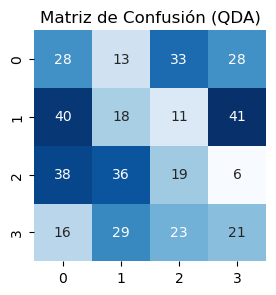

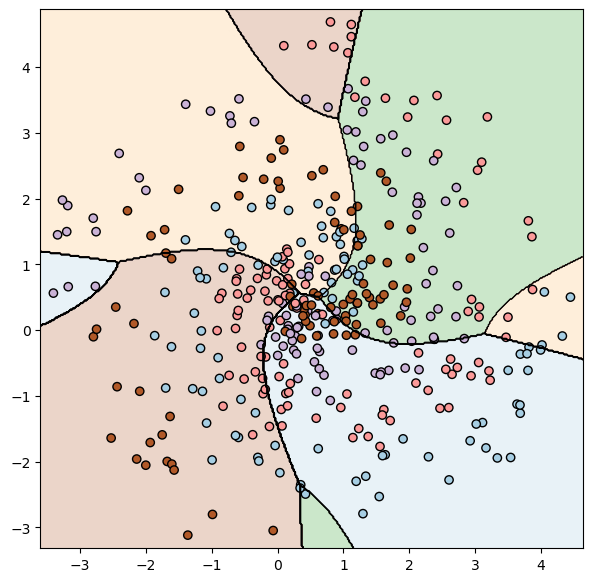

In [8]:
# Entrena un modelo de Análisis Discriminante Cuadrático (QDA)
qda_model = QuadraticDiscriminantAnalysis()
qda_model.fit(X_train, y_train)

# Calcula la precisión en los conjuntos de entrenamiento y prueba
y_train_pred_qda = qda_model.predict(X_train)
y_test_pred_qda = qda_model.predict(X_test)

accuracy_train_qda = accuracy_score(y_train, y_train_pred_qda)
accuracy_test_qda = accuracy_score(y_test, y_test_pred_qda)

print('Precisión en el conjunto de entrenamiento (QDA):', accuracy_train_qda)
print('Precisión en el conjunto de prueba (QDA):', accuracy_test_qda)

# Calcula la matriz de confusión en el conjunto de test
conf_matrix_qda = confusion_matrix(y_test, y_test_pred_qda)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_qda, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión (QDA)')
plt.show()

# Visualiza la frontera de decisión
plot_decision_boundary(qda_model, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Examina las fronteras de decisión que has generado. Reflexiona sobre su forma: ¿Es coherente con lo que esperarías del algoritmo de Análisis Discriminante Cuadrático (QDA)? Considera cómo la naturaleza cuadrática del algoritmo podría influir en la forma de estas fronteras.
2. Evalúa las predicciones realizadas sobre el conjunto de test. Observa su precisión y cómo se distribuyen en relación con las fronteras de decisión. ¿Son estas predicciones consistentes con las fronteras observadas?
3. Reflexiona sobre las diferencias entre los algoritmos LDA y QDA. ¿En qué se distinguen en términos de supuestos, enfoque y resultados en tus datos?

Este análisis te permitirá comprender las características y la eficacia de ambos modelos, LDA y QDA, y cómo se aplican a tu conjunto de datos."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

1. El método Análisis Discriminante Cuadrático (QDA) produce límites cuadráticos y por lo tanto curvos, lo que aporta mayor flexibilidad permitiendo ajustarse mejor a los datos. En nuestro caso observamos que las fronteras de decisión generadas por el modelo QDA muestran una ligera espiral. Este resultado es coherente con las expectativas para un modelo que es capaz de modelar de manera más flexible las relaciones no lineales entre las características.
2. La precisión en ambos conjuntos (entrenamiento y test) para el modelo QDA es baja, con un 26.375% en el conjunto de entrenamiento y un 21.5% en el conjunto de prueba. La precisión no ha mejorado en comparación con LDA, siguen existiendo números significativos de falsos positivos y falsos negativos, indicando que el modelo QDA sigue teniendo dificultades para separar eficazmente las espirales entrelazadas.
3. La principal diferencia entre LDA y QDA es la suposición de la covarianza entre clases. Mientras que LDA asume covarianzas iguales y genera fronteras de decisión lineales, QDA permite covarianzas distintas y puede adaptarse a fronteras de decisión más flexibles. En este caso específico, la baja precisión en ambos casos sugiere que modelos más avanzados son necesarios para obtener un rendimiento óptimo.

**Referencias**:

https://cienciadedatos.net/documentos/28_linear_discriminant_analysis_lda_y_quadratic_discriminant_analysis_qda#Comparaci%C3%B3n_entre_QDA_y_LDA

https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html
s .
</div>

### 1.3. KNN

En este punto, vas a entender el funcionamiento del algoritmo KNN (K-Nearest-Neighbor), que se basa en la proximidad de los puntos de datos en un espacio de características. Analizarás sus ventajas y desventajas, y comprenderás cómo los parámetros que lo componen influyen en su comportamiento.

KNN es un algoritmo de tipo supervisado basado en instancia. Esto significa:

- Supervisado: Tu conjunto de datos de entrenamiento está etiquetado con la clase o resultado esperado.
- Basado en instancia (_Lazy Learning_): El algoritmo no aprende explícitamente un modelo, como en la Regresión Logística o los árboles de decisión. En cambio, memoriza las instancias de entrenamiento y las utiliza como "conocimiento" en la fase de predicción.

Para entender cómo funciona KNN, sigue estos pasos:

1. Calcula la distancia entre el ítem a clasificar y los demás ítems del dataset de entrenamiento.
2. Selecciona los "k" elementos más cercanos, es decir, aquellos con la menor distancia, según el tipo de distancia que utilices (euclídea, coseno, manhattan, etc).
3. Realiza una "votación de mayoría" entre los k puntos seleccionados: la clase que predomine en estos puntos decidirá la clasificación final del ítem analizado.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Realiza los siguientes pasos con el dataset de entrenamiento (_train_):

1. Entrena un clasificador KNN con el hiperparámetro `n_neighbors=2` usando el clasificador `KNeighborsClassifier` de `sklearn`.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.

Si al entrenar el clasificador aparece un aviso (warning) y deseas ignorarlo, ejecuta el siguiente código antes del entrenamiento:

`import warnings`
`warnings.filterwarnings('ignore', message='^.*will change.*$', category=FutureWarning)`"

Esto te permitirá evaluar la efectividad del modelo KNN con `n_neighbors=2` en tu conjunto de datos, y entender cómo se comporta en términos de clasificación y separación de clases.    
    
    
    
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Precisión en el conjunto de entrenamiento (KNN): 0.883125
Precisión en el conjunto de prueba (KNN): 0.775


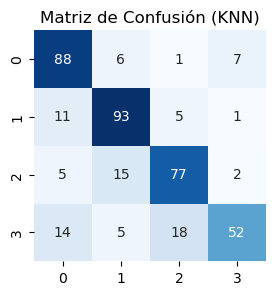

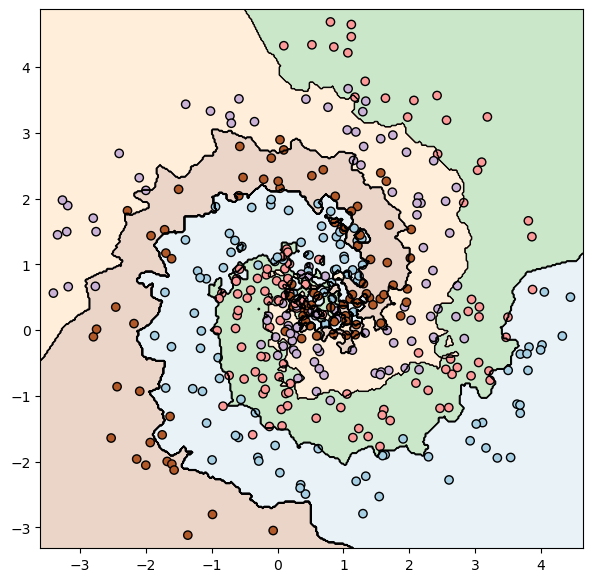

In [9]:
# Entrena un clasificador KNN con n_neighbors=2
knn_model = KNeighborsClassifier(n_neighbors=2)
knn_model.fit(X_train, y_train)

# Calcula la precisión en los conjuntos de entrenamiento y prueba
y_train_pred_knn = knn_model.predict(X_train)
y_test_pred_knn = knn_model.predict(X_test)

accuracy_train_knn = accuracy_score(y_train, y_train_pred_knn)
accuracy_test_knn = accuracy_score(y_test, y_test_pred_knn)

print('Precisión en el conjunto de entrenamiento (KNN):', accuracy_train_knn)
print('Precisión en el conjunto de prueba (KNN):', accuracy_test_knn)

# Calcula la matriz de confusión en el conjunto de test
conf_matrix_knn = confusion_matrix(y_test, y_test_pred_knn)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión (KNN)')
plt.show()

# Visualiza la frontera de decisión
plot_decision_boundary(knn_model, X_test, y_test)

En el modelo que has entrenado, has fijado el parámetro `n_neighbors` de forma arbitraria. Sin embargo, es posible que con otro valor obtengas una mejor predicción. Para encontrar el valor óptimo de los parámetros de un modelo (_hyperparameter tunning_), a menudo se utiliza una búsqueda de rejilla (_grid search_). Esto implica entrenar un modelo para cada combinación posible de hiperparámetros y evaluarlo mediante validación cruzada (_cross validation_) con 5 particiones estratificadas. Luego, seleccionarás la combinación de hiperparámetros que haya obtenido los mejores resultados.

En este caso, te centrarás en optimizar un solo hiperparámetro:

- 𝑘: el número de vecinos que se consideran para clasificar un nuevo ejemplo. Debes probar con todos los valores entre 1 y 20.

Realiza este proceso para identificar el número óptimo de vecinos, lo que te permitirá mejorar la precisión de tus predicciones con el modelo KNN.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>

Para calcular el valor óptimo del hiperparámetro _k_ (`n_neighbors`), debes realizar una búsqueda de rejilla con validación cruzada. Este proceso te ayudará a encontrar el valor óptimo de _k_. Para cada valor, calcula su promedio y la desviación estándar. Luego, implementa un _heatmap_ para visualizar la precisión según los diferentes valores del hiperparámetro.

Utiliza el módulo `GridSearchCV` de `sklearn` para calcular el mejor hiperparámetro. Para la visualización del _heatmap_, emplea la librería `Seaborn`.

Estos pasos te permitirán identificar de manera efectiva y visual el valor de _k_ que maximiza la precisión de tu modelo KNN."
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Mejor valor de k: 15
Precisión asociada: 0.8037
Desviación estándar asociada: 0.0085


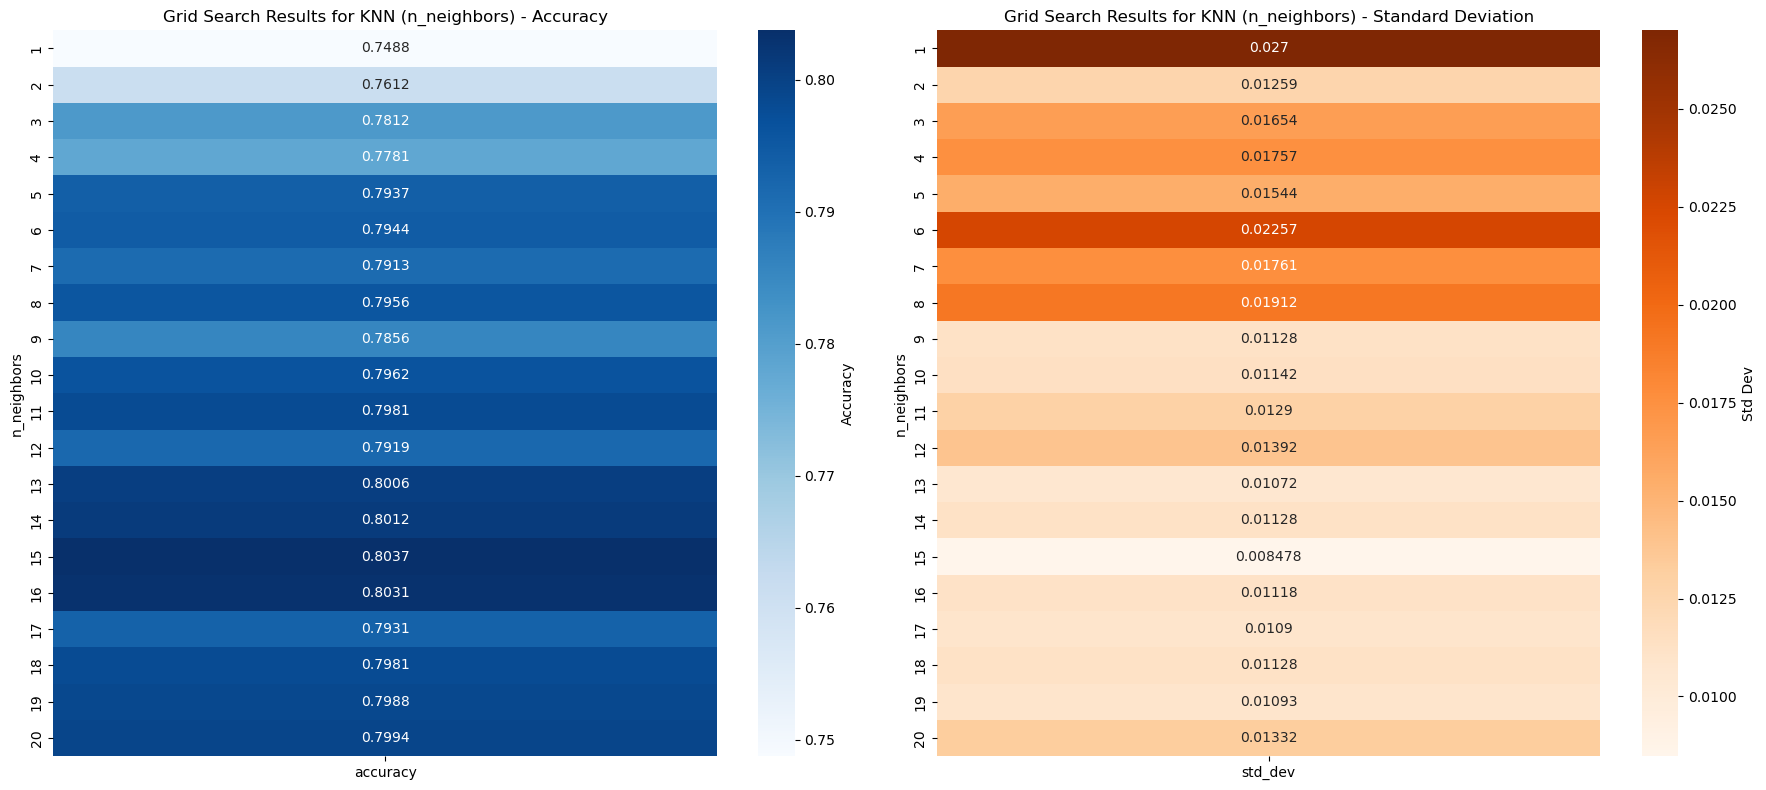

In [10]:
# Define los posibles valores de n_neighbors que quieres probar
param_grid = {'n_neighbors': np.arange(1, 21)}

# Inicializa el clasificador KNN
knn = KNeighborsClassifier()

# Búsqueda de rejilla con validación cruzada (5 particiones estratificadas)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
results = grid_search.cv_results_

# Extrae los valores de k, las puntuaciones del rendimiento y la desviación estándar
k_values = results['param_n_neighbors'].data.astype(int)
accuracy_scores = results['mean_test_score']
std_dev_scores = results['std_test_score']

# Crea un DataFrame con los resultados
results_df = pd.DataFrame({'k': k_values, 'accuracy': accuracy_scores, 'std_dev': std_dev_scores})

# Visualiza los resultados en dos heatmaps (precisión y desviación estándar)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Heatmap para la precisión
heatmap_data = results_df.pivot_table(index='k', values='accuracy', aggfunc='mean')
sns.heatmap(heatmap_data, annot=True, fmt='.4g', cbar_kws={'label': 'Accuracy'}, cmap='Blues', ax=axes[0])
axes[0].set_title('Grid Search Results for KNN (n_neighbors) - Accuracy')
axes[0].set_ylabel('n_neighbors')

# Heatmap para la desviación estándar
heatmap_std_dev = results_df.pivot_table(index='k', values='std_dev', aggfunc='mean')
sns.heatmap(heatmap_std_dev, annot=True, fmt='.4g', cbar_kws={'label': 'Std Dev'}, cmap='Oranges', ax=axes[1])
axes[1].set_title('Grid Search Results for KNN (n_neighbors) - Standard Deviation')
axes[1].set_ylabel('n_neighbors')

# Ajusta el espacio entre los dos subgráficos
plt.tight_layout()

# Muestra el mejor valor de k, su precisión asociada y desviación estándar
best_k = grid_search.best_params_['n_neighbors']
best_accuracy = grid_search.best_score_
best_std_dev = results_df[results_df['k'] == best_k]['std_dev'].values[0]

print(f'Mejor valor de k: {best_k}')
print(f'Precisión asociada: {best_accuracy:.4f}')
print(f'Desviación estándar asociada: {best_std_dev:.4f}')

# Muestra los gráficos
plt.show()

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Sigue estos pasos con el dataset de entrenamiento (_train_):

1. Entrena un clasificador KNN utilizando el mejor hiperparámetro que hayas encontrado.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.

Este proceso te permitirá ver cómo el hiperparámetro óptimo que has identificado mejora la efectividad de tu modelo KNN en la clasificación de los datos.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Precisión en el conjunto de entrenamiento (Mejor KNN): 0.83125
Precisión en el conjunto de prueba (Mejor KNN): 0.79


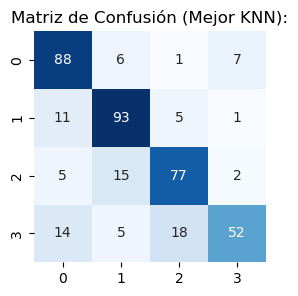

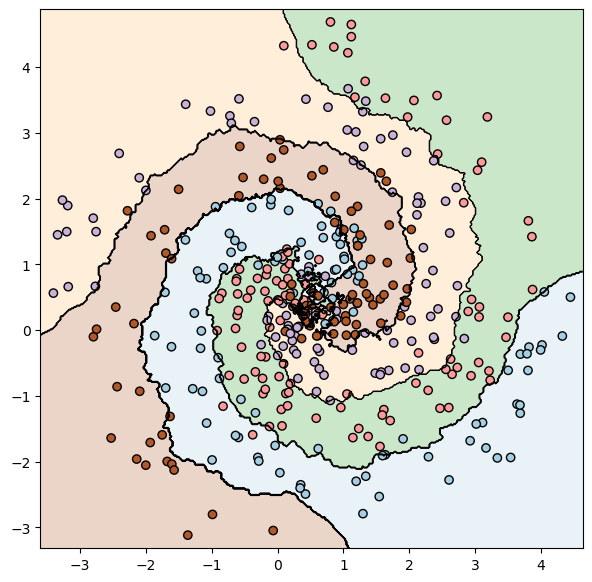

In [11]:
# Mejor valor de k obtenido
best_k = 15

# Entrena un clasificador KNN
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model.fit(X_train, y_train)

# Calcula la precisión en los conjuntos de entrenamiento y prueba
y_train_pred_best_knn = best_knn_model.predict(X_train)
y_test_pred_best_knn = best_knn_model.predict(X_test)

accuracy_train_best_knn = accuracy_score(y_train, y_train_pred_best_knn)
accuracy_test_best_knn = accuracy_score(y_test, y_test_pred_best_knn)

print('Precisión en el conjunto de entrenamiento (Mejor KNN):', accuracy_train_best_knn)
print('Precisión en el conjunto de prueba (Mejor KNN):', accuracy_test_best_knn)

# Calcula la matriz de confusión en el conjunto de test
conf_matrix_best_knn = confusion_matrix(y_test, y_test_pred_best_knn)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión (Mejor KNN):')
plt.show()

# Visualiza la frontera de decisión con los datos de test
plot_decision_boundary(best_knn_model, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Comenta los resultados obtenidos en la búsqueda del mejor hiperparámetro. Reflexiona sobre cómo varió el rendimiento del modelo con los diferentes valores de `n_neighbors`.
2. Analiza cómo se visualiza gráficamente el cambio del valor de `n_neighbors`. ¿Observas alguna tendencia o patrón claro? ¿Es coherente esta diferencia entre los dos gráficos al cambiar el parámetro?
3. Examina las fronteras de decisión que has generado. ¿La forma de estas fronteras tiene sentido dado el algoritmo KNN utilizado? Piensa en cómo la elección del número de vecinos influye en la forma de la frontera.
4. Evalúa las predicciones realizadas sobre el conjunto de test. Observa su precisión y cómo se distribuyen en relación con las fronteras de decisión. ¿Son estas predicciones consistentes con lo que observas en las fronteras de decisión?

Este análisis te ayudará a comprender la eficacia del modelo KNN con diferentes configuraciones de `n_neighbors` y su impacto en la clasificación de los datos."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

1. En la búsqueda del mejor valor para n_neighbors observamos como la precisión aumenta considerablemente hasta k=5, en este punto el valor del hiperparámetro se estabiliza bastante, aumentando o disminuyendo unas pocas décimas en función del valor del hiperparámetro. La máxima precisión la encontramos en n_neighbors = 15. Un número adecuado de vecinos permite al modelo adaptarse mejor a la complejidad de los datos.
2. El heatmap muestra lo descrito anteriormente de una manera visual. Observamos cómo la precisión del modelo varía con diferentes valores de n_neighbors. Se observa una tendencia ascendente en la precisión a medida que n_neighbors aumenta, alcanzando un máximo alrededor de 15 y disminuyendo de nuevo a partir de 16.
3. Al observar las fronteras de decisión, se destaca que con n_neighbors=2, las espirales presentan oscilaciones pronunciadas. En contraste, con n_neighbors=15, las líneas de las espirales se vuelven más suaves y continuas, indicando una adaptación mejor a la complejidad del conjunto de datos.
   La forma de las fronteras de decisión generadas por el algoritmo KNN tiene sentido en función de cómo funciona el propio algoritmo y cómo la elección del número de vecinos influye en la forma de estas fronteras. En k=2, el modelo KNN toma en cuenta únicamente los dos vecinos más cercanos para realizar la predicción por lo que el modelo está siendo altamente influenciado por los puntos individuales más cercanos y es sensible a las variaciones locales. Con un mayor número de vecinos, el modelo se vuelve más robusto frente a variaciones locales. Esto resulta en una frontera de decisión más suave y con las oscilaciones menos pronunciadas.

4. La precisión en el conjunto de prueba experimentó un aumento del 77.5% al 79% al cambiar de n_neighbors=2 a n_neighbors=15. A pesar de que la precisión en el conjunto de entrenamiento fue inicialmente mayor con n_neighbors=2, este resultado era previsible, ya que el modelo se ajustó más a los datos de entrenamiento. 
La mejora en la precisión del conjunto de prueba respalda la elección de n_neighbors=15 como el mejor hiperparámetro para este conjunto de datosEste cambio indica que al considerar un mayor número de vecinos, el modelo generaliza mejor y tiene un rendimiento mejor en datos no vistos.

</div>

### 1.4. SVM

En esta sección, vas a explorar las Máquinas de Vectores de Soporte (SVM), que se basan en el concepto del _Maximal Margin Classifier_ y el hiperplano.

Un hiperplano en un espacio p-dimensional se define como un subespacio plano y afín de dimensiones p-1. En dos dimensiones, es una recta; en tres, un plano convencional. Para dimensiones mayores a tres, aunque no es intuitivo visualizarlo, el concepto se mantiene.

Cuando los casos son perfectamente separables de manera lineal, surgen infinitos posibles hiperplanos. Para seleccionar el clasificador óptimo, utiliza el concepto de _maximal margin hyperplane_, el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. Este se define calculando la distancia perpendicular mínima (margen) de las observaciones a un hiperplano. El hiperplano óptimo es aquel que maximiza este margen.

En el proceso de optimización, debes tener en cuenta que solo las observaciones al margen o que lo violan (vectores soporte) influyen en el hiperplano. Estos vectores soporte son los que definen el clasificador.

#### Los _kernels_ en SVM

En situaciones donde no puedes encontrar un hiperplano que separe dos clases, es decir, cuando las clases no son linealmente separables, puedes utilizar el truco del núcleo (_kernel trick_). Este método te permite trabajar en una dimensión nueva donde es posible encontrar un hiperplano para separar las clases. Puedes ver un ejemplo en [este video](https://www.youtube.com/watch?v=OdlNM96sHio).

Al igual que con el KNN, las SVM también dependen de varios hiperparámetros. En este caso, te enfocarás en optimizar dos hiperparámetros:

1. **C**: la regularización, que es el valor de penalización de los errores en la clasificación. Este valor indica el compromiso entre obtener el hiperplano con el margen más grande posible y clasificar correctamente el máximo número de ejemplos. Debes probar los siguientes valores: 0.01, 0.1, 1, 10, 50, 100 y 200.
   
2. **Gama**: un coeficiente que multiplica la distancia entre dos puntos en el kernel radial. En términos simples, cuanto más pequeño sea gama, más influencia tendrán dos puntos cercanos. Debes probar los valores: 0.001, 0.01, 0.1, 1 y 10.

Para validar el rendimiento del algoritmo con cada combinación de hiperparámetros, utiliza la validación cruzada (_cross-validation_) con 4 particiones estratificadas."

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>


1. Calcula el valor óptimo de los hiperparámetros _C_ y _gama_ utilizando una búsqueda de rejilla con validación cruzada. Este proceso te ayudará a encontrar los valores óptimos.
2. Para cada combinación de valores, calcula su promedio y la desviación estándar.
3. Haz un _heatmap_ para visualizar la precisión según los diferentes valores de los hiperparámetros.

Utiliza el módulo `GridSearchCV` de `sklearn` para calcular los mejores hiperparámetros con el clasificador SVC (de `SVM` de `sklearn`). Para la visualización del _heatmap_, emplea la librería `Seaborn`.

Estos pasos te permitirán identificar de manera efectiva y visual los valores de _C_ y _gama_ que maximizan la precisión de tu modelo SVM.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

         C   gamma  accuracy       std
0     0.01   0.001  0.256875  0.001083
1     0.01   0.010  0.256875  0.001083
2     0.01   0.100  0.256875  0.001083
3     0.01   1.000  0.258125  0.001083
4     0.01  10.000  0.256875  0.001083
5     0.10   0.001  0.256875  0.001083
6     0.10   0.010  0.245625  0.014510
7     0.10   0.100  0.540000  0.027557
8     0.10   1.000  0.806250  0.005728
9     0.10  10.000  0.803125  0.013273
10    1.00   0.001  0.240625  0.020262
11    1.00   0.010  0.273750  0.015562
12    1.00   0.100  0.764375  0.007153
13    1.00   1.000  0.810625  0.014184
14    1.00  10.000  0.803125  0.013961
15   10.00   0.001  0.247500  0.017048
16   10.00   0.010  0.567500  0.028229
17   10.00   0.100  0.800000  0.007289
18   10.00   1.000  0.811250  0.004146
19   10.00  10.000  0.789375  0.018060
20   50.00   0.001  0.250625  0.019715
21   50.00   0.010  0.646875  0.011371
22   50.00   0.100  0.810000  0.008839
23   50.00   1.000  0.818125  0.005962
24   50.00  10.000  0.770

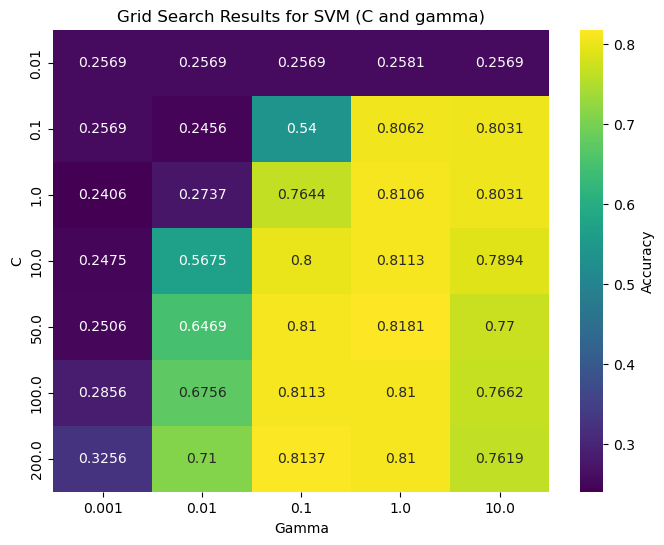

Mejor valor de C: 50
Mejor valor de gamma: 1
Precisión asociada: 0.8181
Desviación estándar asociada: 0.0060


In [12]:
# Define los valores de C y gamma
param_grid = {'C': [0.01, 0.1, 1, 10, 50, 100, 200],
              'gamma': [0.001, 0.01, 0.1, 1, 10]}

# Inicializa el clasificador SVM
svm = SVC()

# Validación cruzada (cross-validation) con 4 particiones estratificadas
grid_search_svm = GridSearchCV(svm, param_grid, cv=4, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)
results_svm = grid_search_svm.cv_results_

# Extrae los valores de C, gamma y las puntuaciones del rendimiento
C_values = results_svm['param_C'].data.astype(float)
gamma_values = results_svm['param_gamma'].data.astype(float)
accuracy_scores_svm = results_svm['mean_test_score']
std_scores_svm = results_svm['std_test_score']

# Crea un DataFrame con los resultados
results_df_svm = pd.DataFrame({'C': C_values, 'gamma': gamma_values, 'accuracy': accuracy_scores_svm, 'std': std_scores_svm})

# Imprime los resultados para verificar
print(results_df_svm)

# Visualiza los resultados en un heatmap
plt.figure(figsize=(8, 6))
heatmap_data_svm = results_df_svm.pivot_table(index='C', columns='gamma', values='accuracy', aggfunc='mean')
sns.heatmap(heatmap_data_svm, annot=True, cmap="viridis", fmt='.4g', cbar_kws={'label': 'Accuracy'})
plt.title('Grid Search Results for SVM (C and gamma)')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()

# Muestra los mejores hiperparámetros y su precisión asociada
best_C_svm = grid_search_svm.best_params_['C']
best_gamma_svm = grid_search_svm.best_params_['gamma']
best_accuracy_svm = grid_search_svm.best_score_
best_std_svm = results_df_svm.loc[(results_df_svm['C'] == best_C_svm) & (results_df_svm['gamma'] == best_gamma_svm), 'std'].values[0]

print(f'Mejor valor de C: {best_C_svm}')
print(f'Mejor valor de gamma: {best_gamma_svm}')
print(f'Precisión asociada: {best_accuracy_svm:.4f}')
print(f'Desviación estándar asociada: {best_std_svm:.4f}')


<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Realiza los siguientes pasos con el dataset de entrenamiento (_train_):

1. Entrena un modelo SVM utilizando la mejor combinación de parámetros que hayas encontrado.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.

Este proceso te permitirá ver cómo la mejor combinación de parámetros mejora la efectividad de tu modelo SVM en la clasificación de los datos.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Precisión en el conjunto de entrenamiento (Mejor SVM): 0.8525
Precisión en el conjunto de prueba (Mejor SVM): 0.77


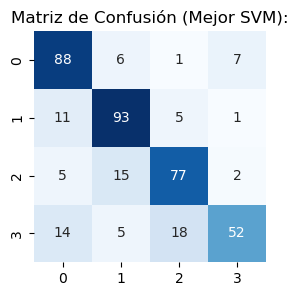

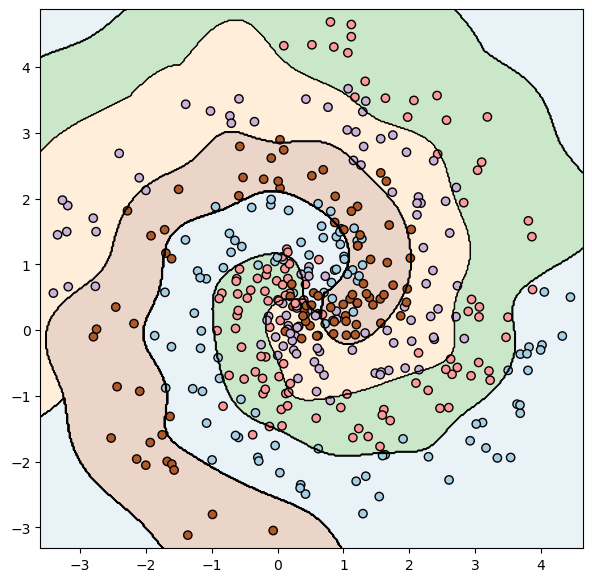

In [13]:
# Mejores valores de C y gamma obtenidos de la búsqueda de rejilla
best_C_svm = 50
best_gamma_svm = 1

# Entrena un modelo SVM con los mejores valores de C y gamma
best_svm_model = SVC(C=best_C_svm, gamma=best_gamma_svm)
best_svm_model.fit(X_train, y_train)

# Calcula la precisión en los conjuntos de entrenamiento y prueba
y_train_pred_svm = best_svm_model.predict(X_train)
y_test_pred_svm = best_svm_model.predict(X_test)

accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
accuracy_test_svm = accuracy_score(y_test, y_test_pred_svm)

print('Precisión en el conjunto de entrenamiento (Mejor SVM):', accuracy_train_svm)
print('Precisión en el conjunto de prueba (Mejor SVM):', accuracy_test_svm)

# Calcula la matriz de confusión en el conjunto de test
conf_matrix_svm = confusion_matrix(y_test, y_test_pred_svm)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión (Mejor SVM):')
plt.show()

# Visualiza la frontera de decisión con los datos de test
plot_decision_boundary(best_svm_model, X_test, y_test)


<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Comenta los resultados obtenidos en la búsqueda de los mejores hiperparámetros. Reflexiona sobre cómo varió el rendimiento del modelo SVM con los diferentes valores de _C_ y _gama_. Considera si los valores óptimos encontrados tienen sentido en el contexto de tu conjunto de datos.
2. Examina las fronteras de decisión que has generado con el modelo SVM. ¿La forma de estas fronteras es coherente con lo que esperarías del algoritmo utilizado? Piensa en cómo la combinación de hiperparámetros seleccionados podría influir en la forma de las fronteras.
3. Evalúa las predicciones realizadas sobre el conjunto de test. Observa su precisión y cómo se distribuyen en relación con las fronteras de decisión. ¿Son estas predicciones consistentes con lo que observas en las fronteras de decisión?

Este análisis te ayudará a comprender la eficacia del modelo SVM con los hiperparámetros seleccionados y su impacto en la clasificación de los datos."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

1.  Los resultados obtenidos en la búsqueda de los mejores hiperparámetros revela que el modelo SVM tiene su mejor desempeño cuando C=50 y gamma=1. La precisión asociada a estos valores es del 81.81%, con una desviación estándar del 0.0060. La precisión del modelo aumenta significativamente a medida que C aumenta, hasta un valor de C=50. Estos valores tienen sentido en el contexto del conjunto de datos, un valor alto de C podría permitir al modelo crear fronteras de decisión más complejas y más flexibles. Esto significa que el modelo podría ajustarse mejor a las curvas y vueltas de las espirales, sin embargo,  un valor extremadamente alto de C podría llevar a un sobreajuste. En nuestro caso, el valor óptimo de C es de 50. En el caso de gamma, define cuán lejos llega la influencia de un solo ejemplo de entrenamiento, siendo valores bajos equivalentes a una influencia "lejana" y valores altos a una influencia "cercana", por lo que un valor demasiado grande puede conducir a un sobreajuste.

2. Las fronteras de decisión observadas son coherentes con nuestras expectativas. Al haber escogido los mejores hiperparámetros las fronteras de decisión son capaces de seguir la forma de las espirales del conjunto de datos. Debido al valor de C relativamente alto el modelo ha sido capaz de crear la compleja frontera de decisión, si éste hubiese sido menor las fronteras de decisión se habrían asemejado menos a las espirales del conjunto de datos. Con respecto a la gamma la elección del gamma óptimo ha permito tener unas fronteras suaves sin demasiadas oscilaciones, un valor demasiado alto habría dado lugar a un sobreajuste y a una frontera de decisión con oscilaciones.

3. El modelo clasifica correctamente el 77% de los puntos del conjunto de test. Observamos una disminución, esperada, con respecto a la precisión del conjunto de entrenamiento que había sido del 85'25%. Observamos como las observaciones que se encuentran cerca de las fronteras de decisión son más propensas a ser clasificadas incorrectamente. Esto era de esperar ya que estos puntos están en una posición donde pequeñas variaciones en los datos pueden llevar a una clasificación diferente.


**Referencias:**

https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
.

</div>

### 1.5. Árboles de decisión

En esta sección, vas a explorar los árboles de decisión, modelos predictivos que se basan en reglas binarias (si/no) para clasificar las observaciones según sus atributos y predecir el valor de la variable respuesta. Estos árboles pueden ser clasificadores, como en tu ejemplo, o regresores para predecir variables continuas.

#### Construcción de un Árbol

Para construir un árbol, sigue el algoritmo de *recursive binary splitting*:

1. Comienza en la parte superior del árbol, donde todas las observaciones pertenecen a la misma región.
2. Identifica todos los posibles puntos de corte para cada uno de los predictores. Estos puntos de corte son los diferentes niveles de los predictores.
3. Evalúa las posibles divisiones para cada predictor utilizando una medida específica. En los clasificadores, estas medidas pueden ser el *classification error rate*, el índice Gini, la entropía o el chi-square.

Comprender estos pasos te ayudará a entender cómo los árboles de decisión crean divisiones binarias para clasificar los datos y cómo estos pueden aplicarse tanto para clasificación como para regresión.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Sigue estos pasos:

1. Con el dataset de entrenamiento (_train_), entrena un árbol de decisión utilizando el clasificador `DecisionTreeClassifier` de la biblioteca `tree` de `sklearn`.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.
5. Representa el árbol de decisión. Puedes utilizar el comando `plot.tree` de la biblioteca `tree` de `sklearn`.

Estos pasos te permitirán evaluar cómo el árbol de decisión se comporta en tu conjunto de datos, tanto en términos de clasificación como en su representación visual."
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Precisión en el conjunto de entrenamiento (Árbol de Decisión): 1.0
Precisión en el conjunto de prueba (Árbol de Decisión): 0.7175


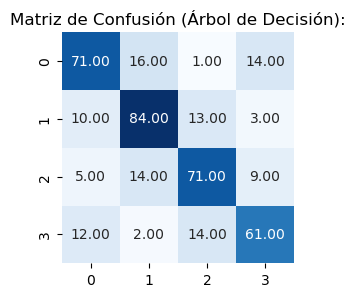

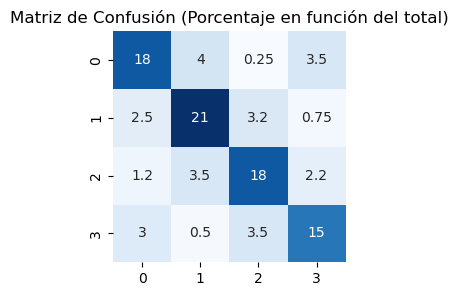

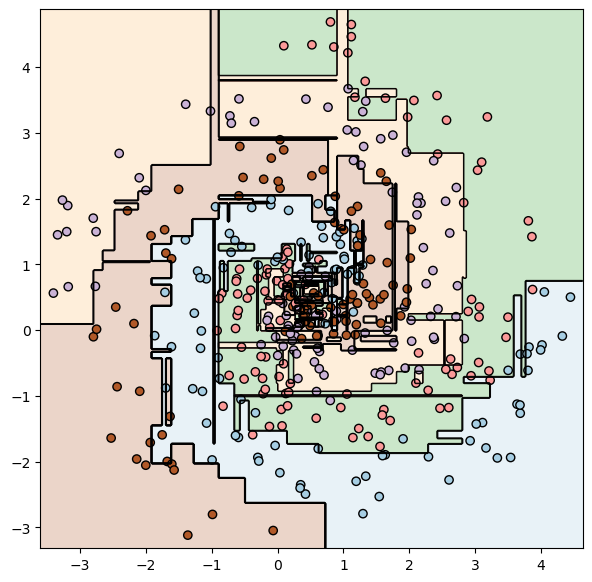

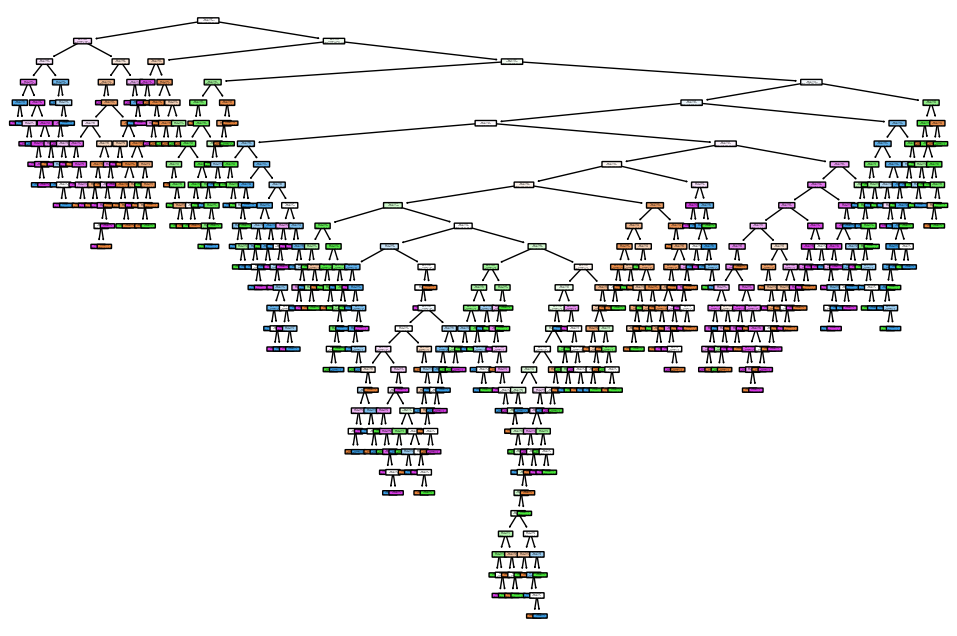

Número total de nodos en el árbol de decisión: 649
Número total de hojas en el árbol de decisión: 325


In [14]:
# Entrena un árbol de decisión con el conjunto de entrenamiento
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Calcula la precisión en los conjuntos de entrenamiento y prueba
y_train_pred_dt = decision_tree_model.predict(X_train)
y_test_pred_dt = decision_tree_model.predict(X_test)

accuracy_train_dt = accuracy_score(y_train, y_train_pred_dt)
accuracy_test_dt = accuracy_score(y_test, y_test_pred_dt)

print('Precisión en el conjunto de entrenamiento (Árbol de Decisión):', accuracy_train_dt)
print('Precisión en el conjunto de prueba (Árbol de Decisión):', accuracy_test_dt)

# Calcula la matriz de confusión en el conjunto de test
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt)
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_dt, annot=True, fmt=".2f", cmap="Blues", cbar=False)
plt.title('Matriz de Confusión (Árbol de Decisión):')
plt.show()

# Calcula los porcentajes dividiendo cada valor en la matriz por la suma total
conf_matrix_percentage = conf_matrix_dt / np.sum(conf_matrix_dt) * 100

# Crea el heatmap con los porcentajes
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix_percentage, annot=True, cmap="Blues", cbar=False)
plt.title('Matriz de Confusión (Porcentaje en función del total)')
plt.show()

# Visualiza la frontera de decisión con los datos de test
plot_decision_boundary(decision_tree_model, X_test, y_test)

# Representa el árbol de decisión
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model, filled=True, feature_names=['X1', 'X2'], rounded=True)
plt.show()

num_leaves = decision_tree_model.tree_.n_leaves
num_nodes = decision_tree_model.tree_.node_count
print(f"Número total de nodos en el árbol de decisión: {num_nodes}")
print(f"Número total de hojas en el árbol de decisión: {num_leaves}")

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Evalúa y comenta los resultados obtenidos con el árbol de decisión. Considera tanto el _accuracy_ del modelo en los conjuntos de _train_ y _test_ como los resultados de la matriz de confusión.
2. Reflexiona sobre cómo la frontera de decisión visualizada en el conjunto de _test_ se alinea con los resultados obtenidos. ¿Es coherente con lo que esperarías de un árbol de decisión?
3. Observa la representación gráfica del árbol. Analiza cómo las diferentes ramificaciones y decisiones tomadas en el árbol explican el comportamiento del modelo y su impacto en la clasificación de los datos.

Este análisis te ayudará a comprender en profundidad el funcionamiento y la eficacia del árbol de decisión en tu conjunto de datos específico."

</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

1. La precisión en el modelo creado con el conjunto de entrenamiento es del 100%, esto podría indicar un sobreentrenamiento del modelo. La precisión del modelo con el conjunto de test se reduce al 71.75%. En la matriz de confusión observamos como el mayor porcentaje de falsos positivos y falsos negativos los observamos en las clases contiguas a las reales, es decir, el modelo, como era de esperar, tiene mayor dificultad de clasificar los puntos cercanos a la frontera.

2. La frontera de decisión es coherente con lo que se esperaría con un árbol de decisión. Las fronteras en este caso no son curvas sino que son líneas rectas en función de las reglas creadas por el árbol para clasificar los datos. Observamos también cambios en las fronteras de decisión que refuerzan la sospecha de la existancia de sobreajuste en el modelo.

3. Observamos un árbol bastante profundo con 649 nodos y con muchas hojas (325). Observamos como el árbol va tomando decisiones en función de si el valor en cuestión es mayor o menor que X1 o X2, dependiendo del nodo en el que nos encontremos.

</div>

#### Evitando el *overfitting*

El proceso de construcción de árboles descrito tiende a reducir rápidamente el error de entrenamiento, por lo que generalmente el modelo se ajusta muy bien a las observaciones utilizadas como entrenamiento (conjunto de *train*). Como consecuencia, los árboles de decisión tienden al *overfitting*.
   
Para evitar el *overfitting* en los árboles de decisión, es crucial que modifiques ciertos hiperparámetros del modelo. Aquí te explico cómo hacerlo:

1. Utiliza el hiperparámetro `max_depth`, que define la profundidad máxima del árbol. Deberás explorar los valores entre 4 y 10 para encontrar el equilibrio adecuado entre la complejidad del modelo y su capacidad para generalizar.
2. Establece el hiperparámetro `min_samples_split`, que es el número mínimo de observaciones que debe tener una hoja del árbol antes de considerar una división. Experimenta con valores como 2, 10, 20, 50 y 100 para asegurarte de que el árbol no se vuelva demasiado específico para las observaciones de entrenamiento.

Ajustando estos hiperparámetros, podrás controlar la tendencia del árbol de decisión a sobreajustarse al conjunto de entrenamiento, mejorando así su capacidad para realizar predicciones efectivas en nuevos datos."

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>

1. Calcula el valor óptimo de los hiperparámetros `max_depth` y `min_samples_split` utilizando una búsqueda de rejilla con validación cruzada. Este proceso te ayudará a encontrar los valores óptimos que evitarán el sobreajuste.
2. Para cada combinación de valores, calcula su promedio y la desviación estándar.
3. Haz un _heatmap_ para visualizar la precisión según los diferentes valores de los hiperparámetros.

Utiliza el módulo `GridSearchCV` de `sklearn` para calcular los mejores hiperparámetros con el clasificador `DecisionTreeClassifier` de `tree` de `sklearn`. Para la visualización del _heatmap_, emplea la librería `Seaborn`.

Estos pasos te permitirán identificar de manera efectiva y visual los valores de `max_depth` y `min_samples_split` que maximizan la precisión de tu árbol de decisión, minimizando el riesgo de sobreajuste.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

    max_depth  min_samples_split  accuracy       std
0           4                  2  0.496250  0.023352
1           4                 10  0.496250  0.023352
2           4                 20  0.495625  0.024004
3           4                 50  0.488750  0.020194
4           4                100  0.442500  0.006374
5           5                  2  0.546875  0.024582
6           5                 10  0.546250  0.024654
7           5                 20  0.544375  0.027578
8           5                 50  0.531875  0.030841
9           5                100  0.475000  0.021937
10          6                  2  0.600625  0.019476
11          6                 10  0.595000  0.018957
12          6                 20  0.591875  0.021533
13          6                 50  0.576250  0.023015
14          6                100  0.518125  0.025762
15          7                  2  0.653125  0.037806
16          7                 10  0.652500  0.036785
17          7                 20  0.645625  0.

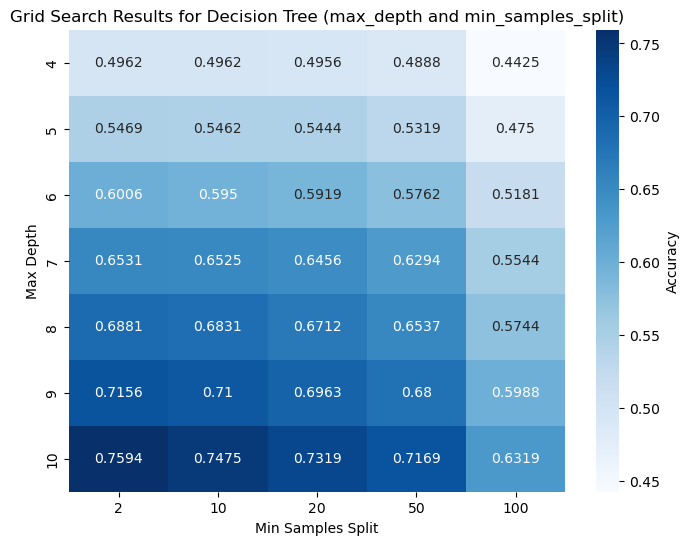

Mejor valor de max_depth: 10
Mejor valor de min_samples_split: 2
Precisión asociada: 0.7594
Desviación estándar asociada: 0.0189


In [15]:
# Define los posibles valores de max_depth y min_samples_split que quieres probar
param_grid_dt = {'max_depth': range(4, 11), 'min_samples_split': [2, 10, 20, 50, 100]}

# Inicializa el clasificador DecisionTreeClassifier
decision_tree_model_optimized = DecisionTreeClassifier(random_state=42)

# Configura la búsqueda de rejilla con validación cruzada (4 particiones estratificadas)
grid_search_dt = GridSearchCV(decision_tree_model_optimized, param_grid_dt, cv=4, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
results_dt = grid_search_dt.cv_results_

# Extrae los valores de max_depth, min_samples_split y las puntuaciones del rendimiento
max_depth_values = results_dt['param_max_depth'].data.astype(int)
min_samples_split_values = results_dt['param_min_samples_split'].data.astype(int)
accuracy_scores_dt = results_dt['mean_test_score']
std_scores_dt = results_dt['std_test_score']

# Crea un DataFrame con los resultados
results_df_dt = pd.DataFrame({'max_depth': max_depth_values, 'min_samples_split': min_samples_split_values, 'accuracy': accuracy_scores_dt, 'std': std_scores_dt})

# Imprime los resultados para verificar
print(results_df_dt)

# Visualiza los resultados en un heatmap
plt.figure(figsize=(8, 6))
heatmap_data_dt = results_df_dt.pivot_table(index='max_depth', columns='min_samples_split', values='accuracy', aggfunc='mean')
sns.heatmap(heatmap_data_dt, annot=True, cmap="Blues", fmt='.4g', cbar_kws={'label': 'Accuracy'})
plt.title('Grid Search Results for Decision Tree (max_depth and min_samples_split)')
plt.xlabel('Min Samples Split')
plt.ylabel('Max Depth')
plt.show()

# Muestra los mejores hiperparámetros y su precisión asociada
best_max_depth_dt = grid_search_dt.best_params_['max_depth']
best_min_samples_split_dt = grid_search_dt.best_params_['min_samples_split']
best_accuracy_dt = grid_search_dt.best_score_
best_std_dt = results_df_dt[(results_df_dt['max_depth'] == best_max_depth_dt) & (results_df_dt['min_samples_split'] == best_min_samples_split_dt)]['std'].values[0]

print(f'Mejor valor de max_depth: {best_max_depth_dt}')
print(f'Mejor valor de min_samples_split: {best_min_samples_split_dt}')
print(f'Precisión asociada: {best_accuracy_dt:.4f}')
print(f'Desviación estándar asociada: {best_std_dt:.4f}')

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>


1. Entrena un árbol de decisión con el dataset de entrenamiento (_train_) utilizando la mejor combinación de parámetros que hayas encontrado.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.
5. Representa el árbol de decisión.

Estos pasos te permitirán evaluar cómo el árbol de decisión, ajustado con los hiperparámetros óptimos, se comporta en tu conjunto de datos, tanto en términos de clasificación como en su representación visual."
    
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Precisión en el conjunto de entrenamiento: 0.854375
Precisión en el conjunto de prueba: 0.6975
Matriz de Confusión (Árbol de Decisión):
[[66 10 10 16]
 [ 9 71 30  0]
 [ 0  7 85  7]
 [ 8  0 24 57]]


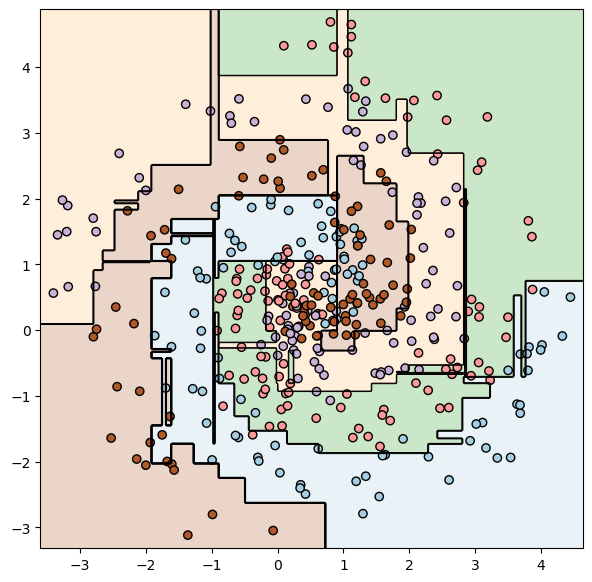

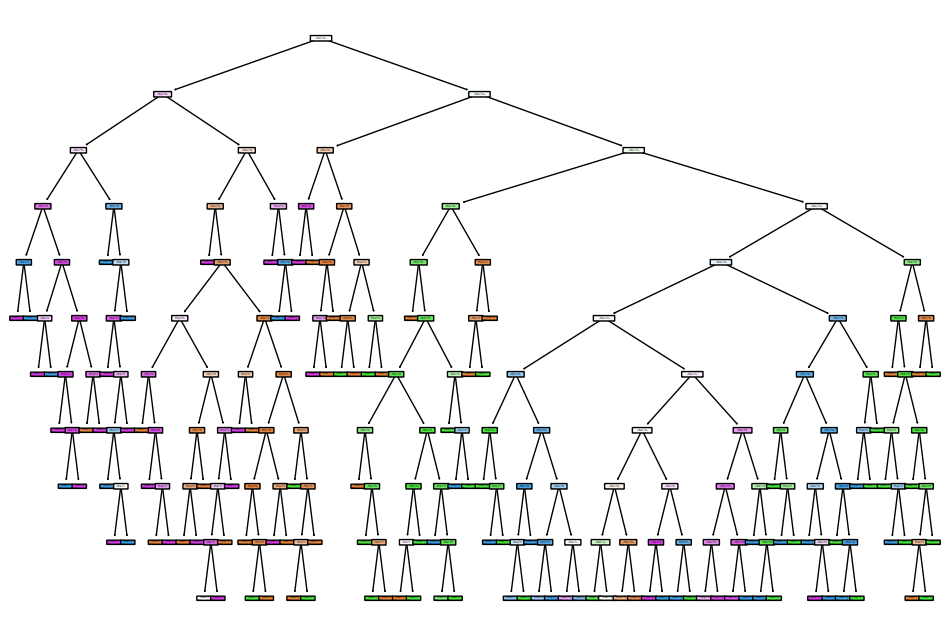

In [16]:
# Mejores valores
best_max_depth_dt = 10
best_min_samples_split_dt = 2

# Entrena un árbol de decisión con la mejor combinación de parámetros
decision_tree_model_optimal = DecisionTreeClassifier(max_depth=best_max_depth_dt, min_samples_split=best_min_samples_split_dt, random_state=42)
decision_tree_model_optimal.fit(X_train, y_train)

# Calcula la precisión en los conjuntos de entrenamiento y prueba
y_train_pred_dt_optimal = decision_tree_model_optimal.predict(X_train)
y_test_pred_dt_optimal = decision_tree_model_optimal.predict(X_test)

accuracy_train_dt_optimal = accuracy_score(y_train, y_train_pred_dt_optimal)
accuracy_test_dt_optimal = accuracy_score(y_test, y_test_pred_dt_optimal)

print('Precisión en el conjunto de entrenamiento:', accuracy_train_dt_optimal)
print('Precisión en el conjunto de prueba:', accuracy_test_dt_optimal)

# Calcula la matriz de confusión en el conjunto de test
conf_matrix_dt = confusion_matrix(y_test, y_test_pred_dt_optimal)
print('Matriz de Confusión (Árbol de Decisión):')
print(conf_matrix_dt)

# Visualiza la frontera de decisión con los datos de test
plot_decision_boundary(decision_tree_model_optimal, X_test, y_test)

# Representa el árbol de decisión óptimo
plt.figure(figsize=(12, 8))
plot_tree(decision_tree_model_optimal, filled=True, feature_names=['X1', 'X2'], rounded=True)
plt.show()


<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Evalúa y comenta los resultados obtenidos en la búsqueda de los mejores hiperparámetros. Considera cómo la combinación óptima de `max_depth` y `min_samples_split` ha impactado el rendimiento del árbol de decisión.
2. Examina las fronteras de decisión generadas con el conjunto de _test_. Reflexiona sobre si la forma de estas fronteras es coherente con lo que esperarías de un árbol de decisión configurado con estos hiperparámetros.
3. Analiza las predicciones realizadas sobre el conjunto de test. Observa su precisión y cómo se distribuyen en relación con las fronteras de decisión. ¿Son consistentes estas predicciones con la estructura del árbol de decisión y las fronteras observadas?

Este análisis te ayudará a comprender la eficacia del árbol de decisión con los hiperparámetros seleccionados y su impacto en la clasificación de los datos."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

1. Observamos como la precisión ha ido aumentando a medida que se aumentaba la profundidad del modelo y se disminuia "min_samples_split". La configuración que ha obtenido una mayor precisión en el rango de hiperparámetros probados, ha sido max_depth=10 y min_samples_split=2. La precisión asociada a esta combinación ha sido de 75.94% con una desviación estándar del: 0.018.
2. Observamos la frontera de decisión algo más suave que en el caso anterior. Esto era de esperar ya que al reducir la profundidad a 10, el modelo se simplifica significativamente, lo que puede resultar en una frontera de decisión más suave.
3. Observamos como la búsqueda de los mejores hiperparámetros no ha conseguido mejorar las predicciones, el modelo anterior tenía una precisión en el conjunto de test del 71.75% y el modelo actual ha dismuido al 69.75%. Aún así, cabe destacar que esta disminución podría ser aceptada en muchos casos en favor de obtener un modelo mucho más sencillo con únicamente 10 nodos frente a los 649 anteriores.
</div>

<a id='ej2'></a>
# 2. Implementación del caso práctico (5 puntos)

Como experto en análisis de datos, sabemos la importancia de que las empresas de tarjetas de crédito puedan identificar y prevenir transacciones fraudulentas para proteger a sus clientes. En este sentido, estudiaremos un conjunto de datos que contiene información sobre transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

Este conjunto de datos presenta transacciones ocurridas en dos días, donde se registraron 492 casos de fraude de un total de 284,807 transacciones. Es importante destacar que todas las variables de entrada son numéricas y fueron obtenidas a través de una transformación PCA. Lamentablemente, debido a razones de confidencialidad, no se pueden proporcionar las características originales ni más información sobre los datos. Las variables V1 a V28 representan los componentes principales obtenidos con PCA, mientras que "Time" e "Amount" son las únicas variables que no han sido transformadas con PCA. La variable "Time" indica los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos, mientras que "Amount" representa el monto de la transacción. La variable "Class" es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Fuente: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

El objetivo de esta sección es abordar el análisis de este conjunto de datos de varias maneras para identificar y prevenir transacciones fraudulentas. Aquí tienes algunos pasos que podrías seguir:

1. **Análisis Exploratorio de Datos (EDA)**: Comienza explorando el conjunto de datos para comprender su estructura y distribución. Dado que las transacciones fraudulentas son mucho menos frecuentes que las transacciones normales, este es un ejemplo de conjunto de datos desbalanceado. Observa la distribución de las variables "Time" y "Amount" y cómo se relacionan con la variable objetivo "Class".

2. **Preprocesamiento de Datos**: Como las variables han sido transformadas usando PCA, es probable que no requieras de mucha transformación adicional. Sin embargo, considera normalizar las variables "Time" y "Amount" para que estén en la misma escala que las componentes principales.

3. **Modelización**: Utiliza un perceptrón multicapa como herramienta de clasificación. Dado que el objetivo es identificar transacciones fraudulentas, es vital centrarse en métricas como la precisión, la sensibilidad (recall), el valor F1 y el área bajo la curva ROC (AUC-ROC).

4. **Ajuste de Hiperparámetros**: Utiliza la validación cruzada para evaluar de una manera más fiable el rendimiento de tu modelos. Además, ajusta los hiperparámetros para mejorar la precisión de tus modelos.

Este enfoque integral te permitirá no solo construir un modelo efectivo para detectar fraudes sino también comprender mejor las características subyacentes de las transacciones fraudulentas en el conjunto de datos.

## 2.0. Carga de datos

Lo primero que debes hacer es cargar el conjunto de datos y visualizar las primeras filas para obtener una vista previa. Asegúrate de verificar lo siguiente:

1. Confirma la cantidad total de filas y columnas en el DataFrame.
2. Revisa el nombre de cada columna del DataFrame.
3. Verifica el número de valores no nulos en cada columna.
4. Identifica el tipo de datos de cada columna, que puede ser int, float, object, entre otros.
5. Comprueba la cantidad de memoria utilizada por el DataFrame.

Estos pasos te proporcionarán una comprensión inicial clara y detallada del conjunto de datos con el que estás trabajando."

In [17]:
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 2.1. Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) en ciencia de datos es un enfoque inicial para comprender y resumir el contenido de un conjunto de datos. Este proceso implica varias técnicas y pasos:

1. **Inspección de Datos**: Se comienza por revisar los datos brutos para identificar su estructura, tamaño y tipo (como numérico, categórico). Esto incluye detectar valores faltantes o inusuales.

2. **Resumen Estadístico**: Se calculan estadísticas descriptivas como la media, mediana, rango, varianza y desviación estándar para obtener una idea general de las tendencias y patrones en los datos.

3. **Visualización de Datos**: Se utilizan gráficos y diagramas (como histogramas, gráficos de caja, diagramas de dispersión) para visualizar distribuciones, relaciones entre variables y posibles anomalías. Esto ayuda a comprender mejor los datos y a identificar patrones o irregularidades.

4. **Análisis de Relaciones y Correlaciones**: Se exploran las relaciones entre diferentes variables para entender cómo se influencian entre sí. Esto puede implicar el uso de matrices de correlación y gráficos de dispersión.

5. **Identificación de Patrones y Anomalías**: Se buscan patrones consistentes o anomalías (como valores atípicos) que puedan sugerir tendencias o problemas en los datos.

El EDA es una fase crítica en cualquier proyecto de ciencia de datos, ya que proporciona una comprensión profunda y una base sólida para posteriores análisis y modelado.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

1. Calcula las frecuencias de la variable objetivo (`Class`) en tu conjunto de datos. Esta variable indica si una transacción es fraudulenta o no.
2. Crea un gráfico de barras para visualizar estas frecuencias. Esto te ayudará a entender la proporción de transacciones fraudulentas en comparación con las legítimas.

A continuación, analiza la distribución de las variables descriptoras:

1. Representa gráficamente el histograma de las 30 variables, separando las observaciones según la clase a la que pertenecen (fraude o no fraude).
2. Organiza todos los histogramas en un formato de 10 filas y 3 columnas. Esto facilitará la comparación visual de las distribuciones para cada clase en cada variable.

Estos pasos te permitirán obtener una visión más clara de la estructura de tu conjunto de datos y cómo las diferentes variables pueden influir en la identificación de transacciones fraudulentas."
    </div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Class
0    284315
1       492
Name: count, dtype: int64


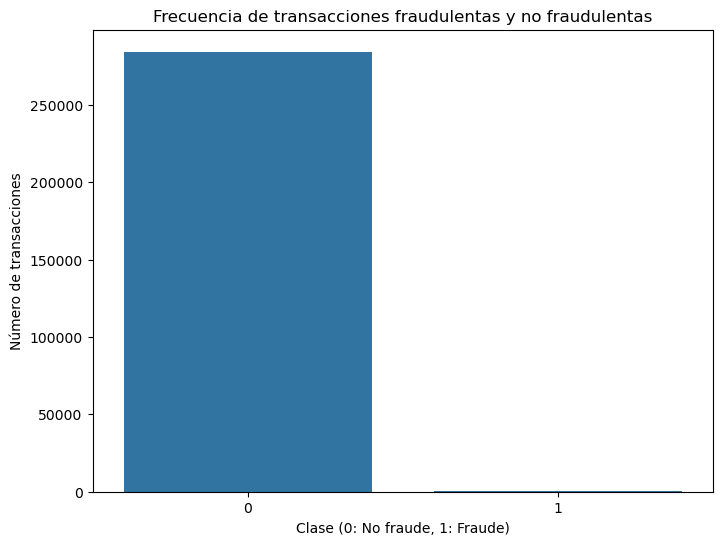

In [19]:
# Frecuencias de la variable objetivo (Class)
class_counts = data['Class'].value_counts()
print(class_counts)

# Gráfico de barras para visualizar las frecuencias de Class
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Frecuencia de transacciones fraudulentas y no fraudulentas')
plt.xlabel('Clase (0: No fraude, 1: Fraude)')
plt.ylabel('Número de transacciones')
plt.show()

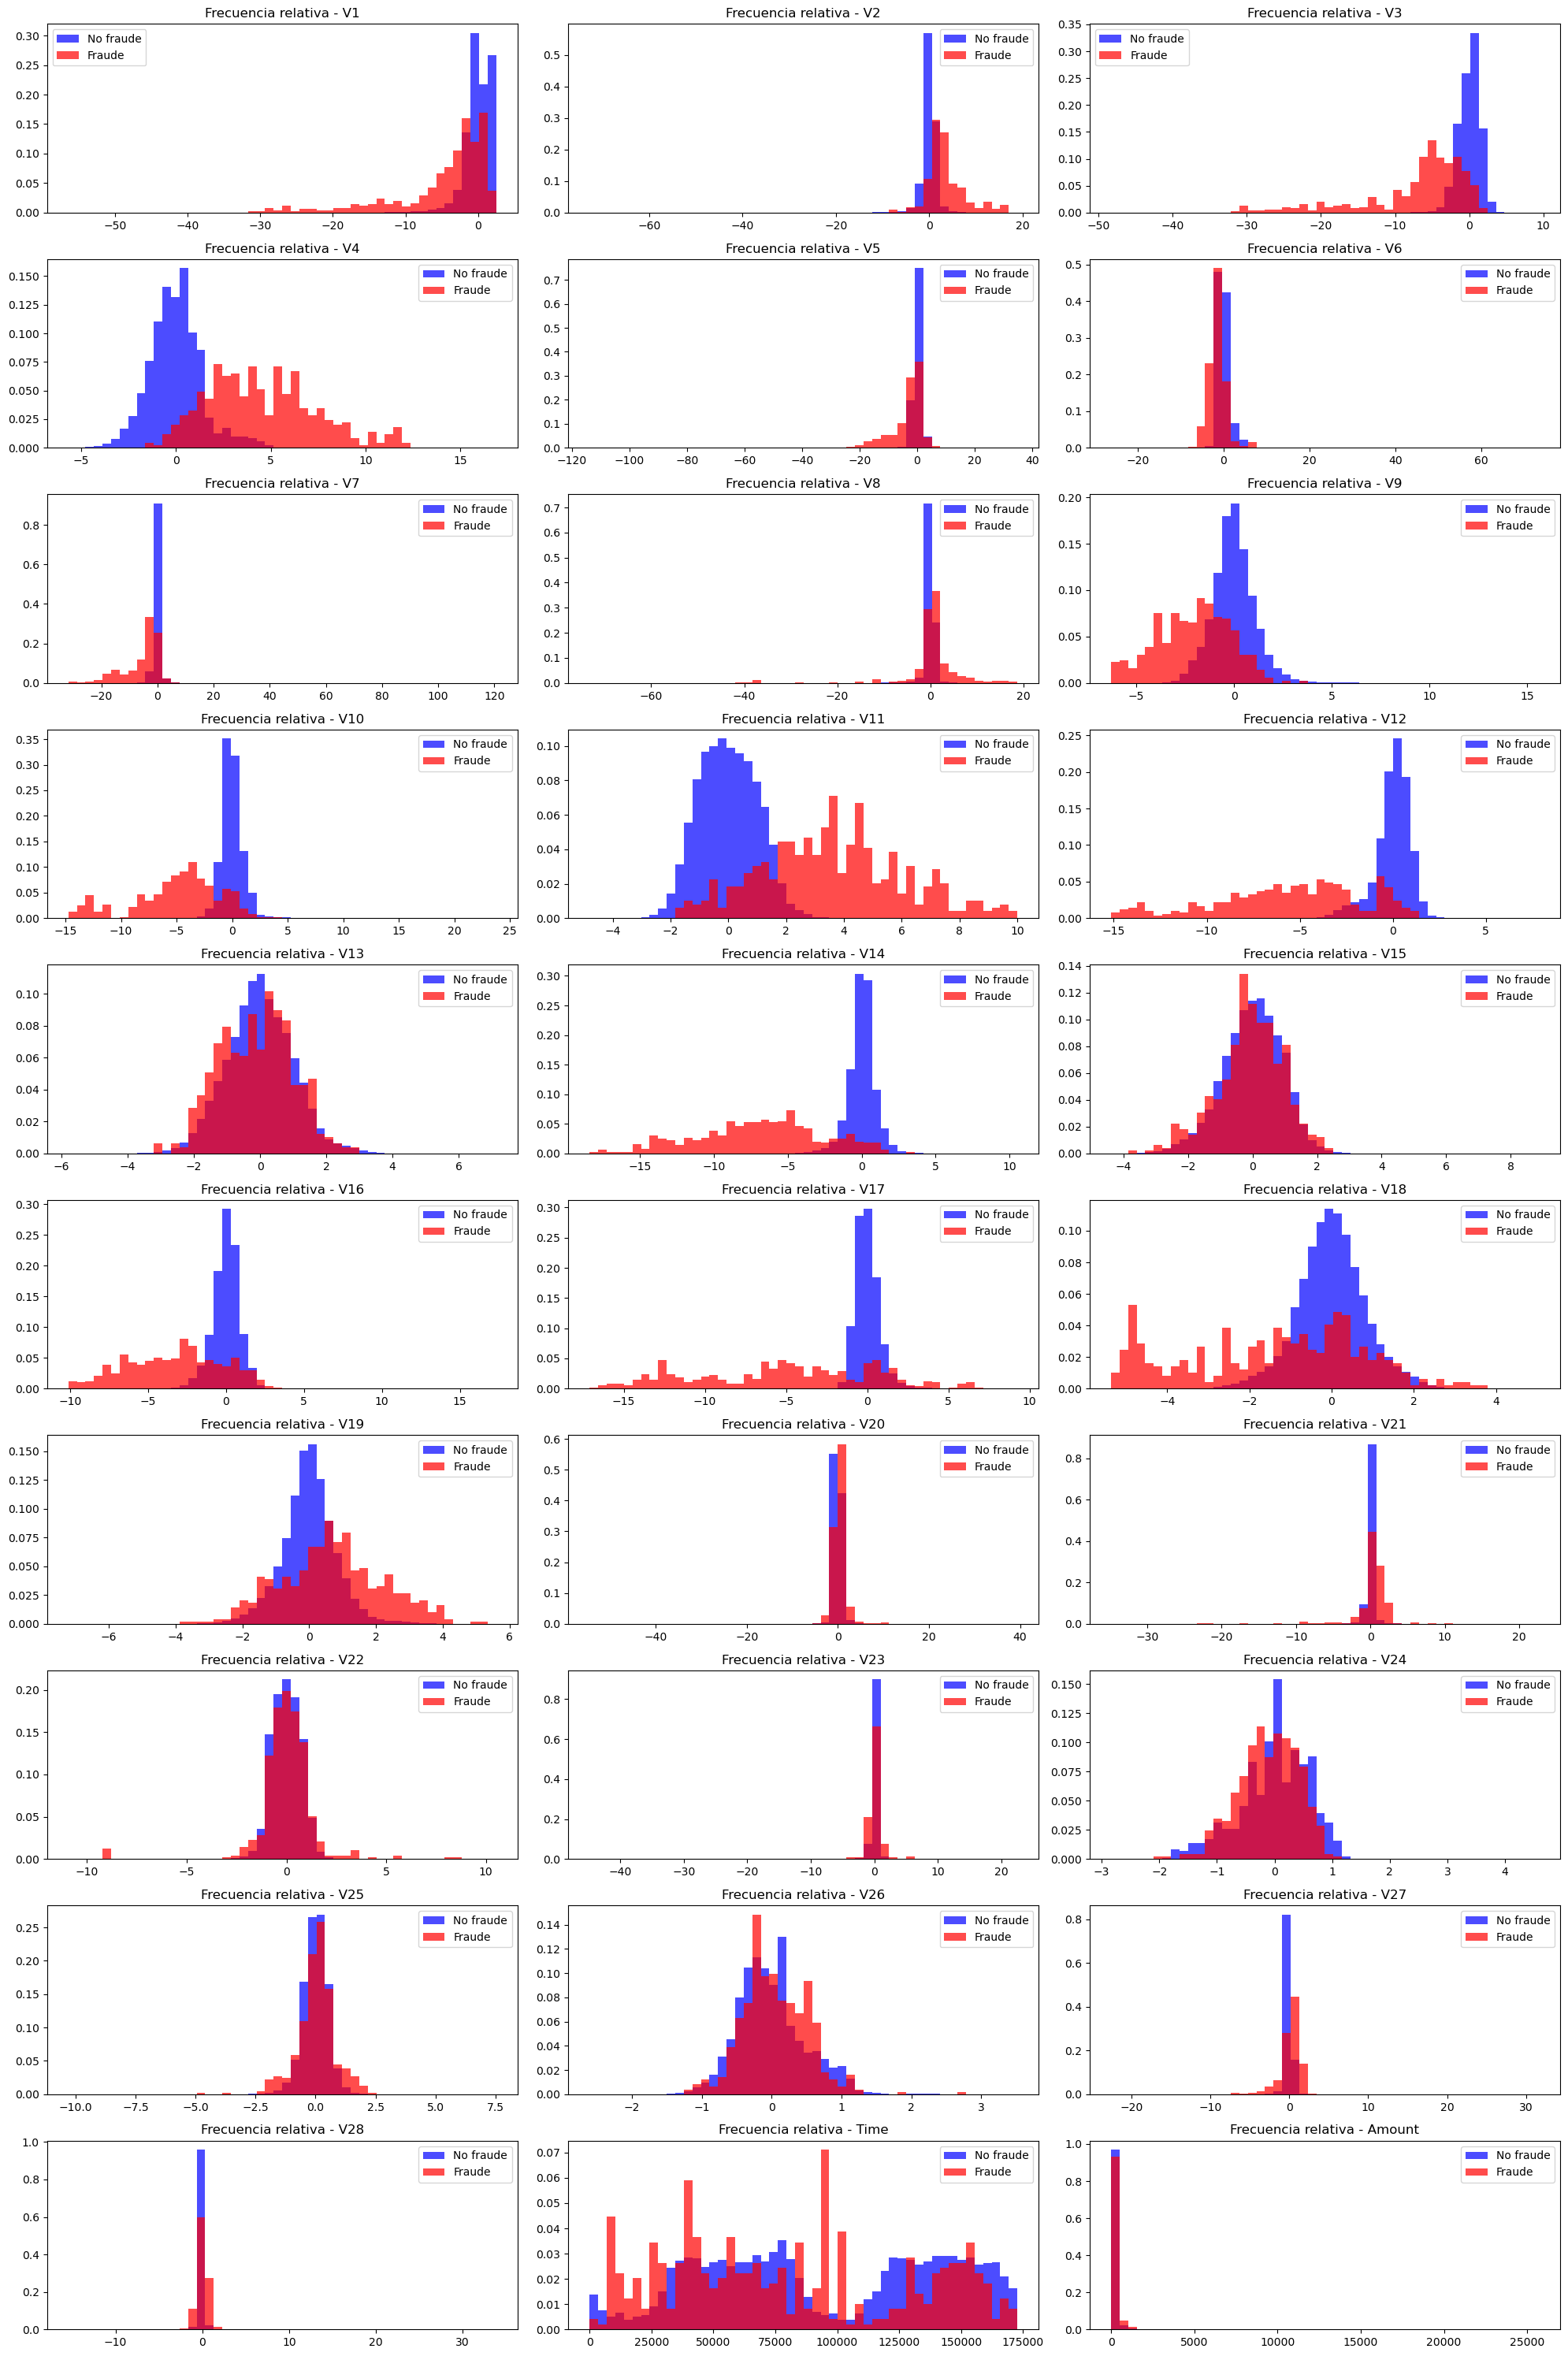

In [20]:
# Distribución de Variables (Frecuencia Relativa) para Transacciones con y sin Fraude
plt.figure(figsize=(20, 30))

for i in range(1, 29):
    plt.subplot(10, 3, i)
    _, bins, _ = plt.hist(data[data['Class'] == 0]['V' + str(i)], bins=50, color='blue', alpha=0.7, label='No fraude', weights=[1/len(data[data['Class'] == 0])]*len(data[data['Class'] == 0]))
    _ = plt.hist(data[data['Class'] == 1]['V' + str(i)], bins=bins, color='red', alpha=0.7, label='Fraude', weights=[1/len(data[data['Class'] == 1])]*len(data[data['Class'] == 1]))
    plt.title('Frecuencia relativa - V' + str(i))
    plt.legend()

# Histograma de Time separado por la variable Class
plt.subplot(10, 3, 29)
_, bins, _ = plt.hist(data[data['Class'] == 0]['Time'], bins=50, color='blue', alpha=0.7, label='No fraude', weights=[1/len(data[data['Class'] == 0])]*len(data[data['Class'] == 0]))
_ = plt.hist(data[data['Class'] == 1]['Time'], bins=bins, color='red', alpha=0.7, label='Fraude', weights=[1/len(data[data['Class'] == 1])]*len(data[data['Class'] == 1]))
plt.title('Frecuencia relativa - Time')
plt.legend()

# Histograma de Amount separado por la variable Class
plt.subplot(10, 3, 30)
_, bins, _ = plt.hist(data[data['Class'] == 0]['Amount'], bins=50, color='blue', alpha=0.7, label='No fraude', weights=[1/len(data[data['Class'] == 0])]*len(data[data['Class'] == 0]))
_ = plt.hist(data[data['Class'] == 1]['Amount'], bins=bins, color='red', alpha=0.7, label='Fraude', weights=[1/len(data[data['Class'] == 1])]*len(data[data['Class'] == 1]))
plt.title('Frecuencia relativa - Amount')
plt.legend()

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Evalúa la relación de las frecuencias de la variable `Class`. Reflexiona sobre cómo se distribuyen las transacciones entre fraudulentas y no fraudulentas. ¿Es la distribución significativamente desigual? ¿Qué implica esto para el análisis y la modelización de los datos?
2. Analiza la información proporcionada por los histogramas de las variables descriptoras. Observa si hay diferencias notables en las distribuciones de estas variables entre las clases. Pregúntate: ¿Hay variables que muestren patrones distintos para las transacciones fraudulentas en comparación con las legítimas?
3. Considera si hay otras formas de visualización que podrían ser útiles para entender mejor los datos. Por ejemplo, ¿serían útiles los diagramas de caja (boxplots) para visualizar la distribución de las variables en ambas clases? ¿Podría un mapa de calor de la matriz de correlación entre variables ayudarte a entender las relaciones entre ellas?

Este análisis te ayudará a obtener una comprensión más profunda de la naturaleza de tus datos y a identificar posibles características que podrían ser importantes para detectar transacciones fraudulentas."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

1. La distribución de la variable "Class" en este conjunto de datos es altamente desigual según observamos en el gráfico de barras.  De las 284807 transacciones del dataset únicamente 492 son fraudulentas. En el contexto del conjunto de datos es de esperar un conjunto de datos desbalanceado y habrá que tenerlo en cuenta en el posterior análisis para asegurar que el modelo no esté sesgado hacia las transacciones no fraudulentas. Se pueden aplicar técnicas de sobremuestreo o submuestreo para que el rendimiento del modelo no se vea afectado.
2. Dado el desbalance en el conjunto de datos, se han generado histogramas considerando las frecuencias relativas para permitir una mejor observación de la distribución de la clase minoritaria (fraudes). Al analizar estos histogramas, se identifican algunas variables en las que la distribución de las transacciones fraudulentas y las no fraudulentas son diferentes. Esto sugiere la presencia de patrones distintos que podrían ser útiles en el posterior análisis y creación del modelo.
3. Sí, hay otros gráficos que podrían ayudarnos a entender mejor el conjunto de datos. Es recomendable realizar diferentes tipos de gráficos para entender el conjunto de datos lo mejor posible. Un diagrama de caja o boxplot nos aportaría información sobre la distribución de las variables según las dos clases (fraude y no fraude) aportando también información valiosa de, por ejempo, los outliers. Un mapa de calor de la matriz de correlación nos aportaría información sobre los relaciones entre las varaibles y podría ser útil para identificar patrones de correlación y seleccionar las variables más relevantes para el modelado y/o comprender mejor el conjunto de datos.
</div>

### 2.2. Preprocesamiento de Datos

El preprocesamiento de datos en ciencia de datos es un paso crucial que involucra la preparación y transformación de datos brutos en un formato adecuado para su posterior análisis y modelado. Este proceso incluye varias tareas esenciales:

1. **Limpieza de Datos**: Se eliminan o corrigen datos erróneos, incompletos, inexactos o irrelevantes. Esto puede incluir tratar con valores faltantes, corregir errores de entrada y manejar outliers.

2. **Normalización y Escalado**: Los datos se transforman para que estén en una escala común, sin distorsionar diferencias en los rangos de valores ni perder información. Por ejemplo, escalado min-max o estandarización.

3. **Codificación de Variables Categóricas**: Las variables categóricas (como género o país) se convierten en formatos numéricos para que puedan ser procesadas por algoritmos de aprendizaje automático, utilizando técnicas como codificación one-hot o codificación de etiquetas.

4. **División de Datos**: Los datos se dividen en conjuntos de entrenamiento, validación y prueba, permitiendo entrenar modelos, afinar hiperparámetros y evaluar el rendimiento del modelo de manera efectiva.

5. **Manejo de Datos Desbalanceados**: En casos de conjuntos de datos desbalanceados, se aplican técnicas como sobremuestreo o submuestreo para asegurar que el modelo no esté sesgado hacia la clase más frecuente.

6. **Ingeniería de Características**: Se crean nuevas variables (características) a partir de los datos existentes para mejorar la capacidad del modelo para aprender patrones y hacer predicciones.

El preprocesamiento es esencial para mejorar la calidad de los datos y hacerlos más adecuados y efectivos para análisis y modelado en proyectos de ciencia de datos.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

1. Dado que las columnas `Time` y `Amount` presentan problemas para su uso directo en el análisis, primero elimina la columna `Time` del conjunto de datos. No está claro qué significa esta columna, por lo que su eliminación simplificará tu análisis.
2. A continuación, transforma la columna `Amount` para reducir su rango. Antes de tomar el logaritmo de `Amount`, suma 0.001 (un céntimo de dólar) a cada valor en esta columna para evitar la indeterminación cuando el valor es 0.
3. Después de realizar esta suma, calcula el logaritmo de `Amount` transformado.
4. Finalmente, reemplaza la columna original `Amount` en tu DataFrame por esta nueva columna de `Log Amount`.

Estos ajustes te ayudarán a normalizar la escala de los datos y a mejorar la eficacia de tus modelos de análisis."

</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [21]:
# Eliminar la columna Time
data = data.drop('Time', axis=1)

# Sumar 0.001 a cada valor en la columna Amount
data['Amount'] = data['Amount'] + 0.001

# Calcular el logaritmo de Amount transformado
data['Log_Amount'] = np.log(data['Amount'])

# Eliminar la columna original Amount
data = data.drop('Amount', axis=1)

# Visualizar las primeras filas del DataFrame después de las transformaciones
print(data.head(2))


         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   

        V25       V26       V27       V28  Class  Log_Amount  
0  0.128539 -0.189115  0.133558 -0.021053      0    5.008105  
1  0.167170  0.125895 -0.008983  0.014724      0    0.989913  

[2 rows x 30 columns]


<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Aquí tienes el texto reescrito en segunda persona del singular y en imperativo:

Para la implementación, sigue estos pasos:

1. Primero, separa los descriptores de la variable respuesta. Asigna los descriptores al conjunto `X` y la variable respuesta al conjunto `y`.
2. Divide el _dataset_ en dos subconjuntos: uno para entrenamiento (_train_) y otro para pruebas (_test_). Asigna el 80% de los datos al conjunto de entrenamiento (`X_train`, `y_train`) y el 20% al conjunto de pruebas (`X_test`, `y_test`). Utiliza la función `train_test_split` de la biblioteca `model_selection` de `sklearn`. Asegúrate de usar `random_state = 24` y haz una división estratificada para mantener la misma proporción de clases en ambos conjuntos.
3. Es importante que las matrices de las clases `y_train` e `y_test` estén codificadas. Para esto, utiliza la función `to_categorical` de la librería `TensorFlow` de `Keras`. Esto convertirá las etiquetas de clase en matrices de etiquetas de clase codificadas en one-hot.

Recuerda, la codificación one-hot convierte las etiquetas categóricas en vectores binarios. En estos vectores, el valor de 1 se asigna a la posición correspondiente a la clase y el valor de 0 a todas las demás posiciones. Esto facilita que los modelos de aprendizaje automático procesen y entiendan las etiquetas categóricas.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [22]:
# Separar descriptores y variable respuesta
X = data.drop('Class', axis=1)
y = data['Class']

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24, stratify=y)

# Convertir etiquetas de clase a codificación one-hot
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

1. Normaliza los descriptores utilizando el `StandardScaler` de `sklearn`. Esto estandarizará las características restando la media y dividiendo por la desviación estándar.
2. Muestra las dimensiones del conjunto de descriptores original, del conjunto de entrenamiento y del conjunto de prueba. Esto te permitirá ver cómo se han dividido los datos.

<strong>Nota:</strong> Ajusta el `StandardScaler` únicamente con los descriptores de entrenamiento para evitar la fuga de información o 'data leakage'. La fuga de información ocurre cuando se utiliza información del conjunto de prueba o validación en el proceso de ajuste del modelo. Es decir, si ajustas el modelo de escalado con todo el conjunto de datos, estarías utilizando información del conjunto de prueba o validación en el ajuste, lo que podría dar la impresión de que el modelo es más preciso de lo que realmente es. Por lo tanto, asegúrate de ajustar el `StandardScaler` solo con los datos de entrenamiento y luego aplicarlo a los conjuntos de entrenamiento y prueba."
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [23]:
# Normalizar los descriptores con StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Mostrar las dimensiones de los conjuntos de datos
print("Dimensiones del conjunto de descriptores original (X):", X.shape)
print("Dimensiones del conjunto de entrenamiento (X_train_scaled):", X_train_scaled.shape)
print("Dimensiones del conjunto de prueba (X_test_scaled):", X_test_scaled.shape)


Dimensiones del conjunto de descriptores original (X): (284807, 29)
Dimensiones del conjunto de entrenamiento (X_train_scaled): (227845, 29)
Dimensiones del conjunto de prueba (X_test_scaled): (56962, 29)


## 2.3. Modelización

El MLP (Perceptrón Multicapa) es, sin duda, una poderosa herramienta en el campo del aprendizaje automático y la inteligencia artificial. Puede manejar tareas de clasificación y regresión, lo que lo hace versátil para una variedad de problemas. Su capacidad para modelar relaciones no lineales complejas lo convierte en una elección popular cuando los datos no siguen patrones lineales simples.

Aquí hay algunos puntos clave sobre el MLP:

- **Capas y Neuronas**: El MLP consta de múltiples capas de neuronas, que incluyen una capa de entrada, una o más capas ocultas y una capa de salida. Cada neurona en una capa está conectada a todas las neuronas en la capa siguiente.

- **Funciones de Activación**: Para introducir no linealidad en el modelo, se utilizan funciones de activación en las neuronas, como la función sigmoide, ReLU (Rectified Linear Unit) o tangente hiperbólica. Estas funciones permiten al MLP capturar patrones complejos en los datos.

- **Aprendizaje Supervisado**: El entrenamiento del MLP implica ajustar los pesos de las conexiones entre neuronas para minimizar la diferencia entre las salidas producidas por la red y las salidas deseadas. Esto se hace utilizando algoritmos de aprendizaje supervisado, como el descenso del gradiente.

- **Ajuste de Hiperparámetros**: Al igual que otros modelos de aprendizaje automático, el MLP tiene hiperparámetros importantes, como el número de capas ocultas, el número de neuronas en cada capa, la función de activación y la tasa de aprendizaje. A menudo, es necesario ajustar estos hiperparámetros para obtener un buen rendimiento en una tarea específica.

- **Generalización**: Uno de los desafíos en el entrenamiento de MLP es evitar el sobreajuste (overfitting), donde el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos. La regularización y la validación cruzada son técnicas comunes para abordar este problema.

En este contexto de detección de fraude en transacciones de tarjetas de crédito, el MLP puede ser una excelente opción para modelar patrones complejos que indiquen transacciones fraudulentas. Sin embargo, es importante ajustar y evaluar cuidadosamente el modelo para garantizar que funcione de manera efectiva en esta tarea crítica de seguridad.

Crear y entrenar un MLP con 4 capas ocultas, cada una con 20 neuronas y función de activación ReLU es una excelente elección. La función de activación ReLU (Rectified Linear Unit) es comúnmente utilizada en capas ocultas de redes neuronales debido a su capacidad para introducir no linealidad en el modelo, lo que le permite aprender patrones complejos en los datos.

Por otra parte, el enfoque de apilar capas secuencialmente utilizando la clase `Sequential` de Keras es una forma eficaz y sencilla de construir modelos de redes neuronales. Luego, durante el entrenamiento, se pueden realizar ajustes en los hiperparámetros y la arquitectura del modelo para optimizar su rendimiento en la tarea específica.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

1. Comienza creando el modelo `Sequential`.
2. Agrega 4 capas ocultas, cada una con 20 neuronas, utilizando el método `.add()`. Asegúrate de que cada capa tenga una función de activación `relu`.
3. Después, agrega la capa de salida con 2 neuronas (una para la clase 0 y otra para la clase 1) y utiliza la función de activación `sigmoid`.
4. No olvides mostrar un resumen del modelo que has creado utilizando el método `.summary()`.
5. Ahora, es hora de compilar el modelo. Utiliza el método `.compile()` y especifica el optimizador como `adam`, la función de pérdida como `binary_crossentropy`, y la métrica de evaluación como `accuracy`.
6. Luego, procede a entrenar el modelo utilizando el método `.fit()`. Asegúrate de entrenar con los datos de `X_train`, establece el número de épocas en 100 y el tamaño del lote en 2048. Además, valida el rendimiento utilizando la técnica de validación cruzada con el 80% de los datos de entrenamiento. Configura el parámetro `validation_split` en 0.2 para lograr esto.
7. Para el informe final, crea gráficos que muestren la pérdida (`loss`) tanto en el entrenamiento como en la validación a lo largo de las épocas.
8. También, genera gráficos que representen la exactitud (`accuracy`) en el entrenamiento y la validación a lo largo de las épocas.
9. Recuerda configurar `verbose=0` al entrenar para evitar mostrar información durante el proceso.
    
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                600       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 2)                 42        
                                                                 
Total params: 1,902
Trainable params: 1,902
Non-trainable params: 0
_________________________________________________________________


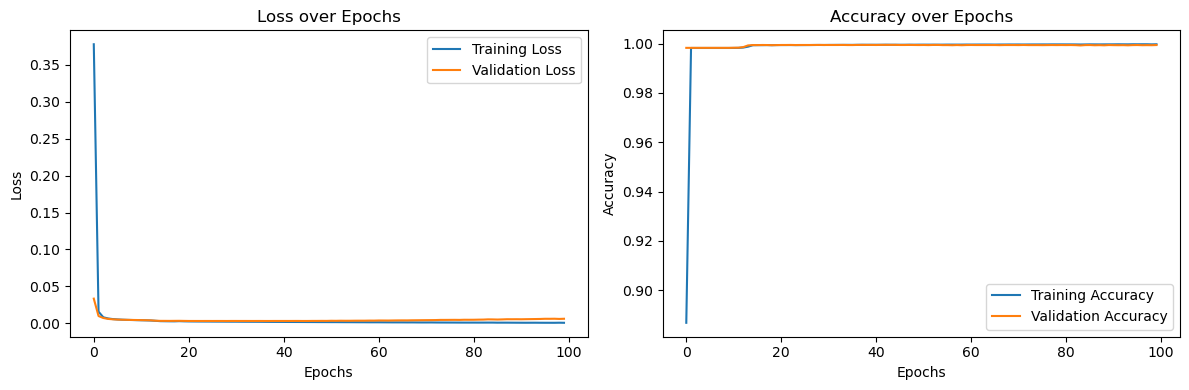

In [24]:
# Crear el modelo Sequential
model = Sequential()

# Agregar 4 capas ocultas con 20 neuronas cada una y activación relu
model.add(Dense(20, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))

# Agregar la capa de salida con función de activación sigmoid
model.add(Dense(2, activation='sigmoid'))

# Mostrar un resumen del modelo
model.summary()

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train_encoded, epochs=100, batch_size=2048, validation_split=0.2, verbose=0)

# Obtener historial de pérdida y precisión
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Graficar pérdida durante el entrenamiento y la validación
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión durante el entrenamiento y la validación
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Luego de haber entrenado y validado el modelo, es hora de realizar la prueba final. Sigue los siguientes pasos:

1. Utiliza el modelo para predecir la clase de `X_test`.
2. Calcula la matriz de confusión para evaluar el rendimiento de las predicciones.
3. Calcula la precisión (accuracy) para medir la exactitud de las predicciones.
4. Calcula la sensibilidad (recall) para evaluar la capacidad del modelo para identificar positivos reales.
5. Calcula el valor F1, que es una medida que combina precisión y sensibilidad.
6. Finalmente, calcula el área bajo la curva ROC (AUC-ROC) para evaluar el rendimiento del modelo en la clasificación binaria.

<strong>Nota:</strong> Repite varias veces todo el proceso y verifica la variablidad d elos resultados.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [25]:
# Realizar predicciones en el conjunto de prueba
y_pred_test = model.predict(X_test_scaled)

# Convertir las probabilidades a clases (0 o 1)
y_pred_test_classes = np.argmax(y_pred_test, axis=1)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_test_classes)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred_test_classes)

# Calcular la sensibilidad (recall)
recall = recall_score(y_test, y_pred_test_classes)

# Calcular el valor F1
f1 = f1_score(y_test, y_pred_test_classes)

# Calcular el área bajo la curva ROC (AUC-ROC)
roc_auc = roc_auc_score(y_test, y_pred_test[:, 1])

# Imprimir resultados
print("Matriz de Confusión:")
print(conf_matrix)
print("\nPrecisión (Accuracy):", accuracy)
print("Sensibilidad (Recall):", recall)
print("Valor F1:", f1)
print("Área bajo la curva ROC (AUC-ROC):", roc_auc)


1781/1781 [==============================] - 2s 1ms/step
Matriz de Confusión:
[[56842    22]
 [   20    78]]

Precisión (Accuracy): 0.9992626663389628
Sensibilidad (Recall): 0.7959183673469388
Valor F1: 0.7878787878787878
Área bajo la curva ROC (AUC-ROC): 0.9406966711839492


<div class="alert alert-block alert-info">
<strong>Análisis:</strong>
    
1. Realiza un análisis de los resultados y decide si consideras que este modelo es aceptable.
2. Evalúa cuál de las medidas de rendimiento utilizadas es la más apropiada.
3. Examina la distribución de las clases y plantea una estrategia, si es necesario, para asegurar la confiabilidad del estudio realizado.
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>
    
1. Los resultados obtenidos muestran que el modelo tienen un rendimiento aceptable. La matriz de confusión nos indica que la mayoría de predicciones caen en las categorías correctas (99.92 % de precisión), sin embargo dado el conjunto de datos desbalanceados es necesario observar otras métricas. La sensibilidad (Recall) muestra como el modelo es capaz de identificar un 79.59% de transacciones fraudulentas, es un porcentaje aceptable aunque intentaremos  mejorarlo. El área bajo la curva también indica que nos encontramos ante un buen modelo.
2. Dado que la mayoría de las transacciones son no fraudulentas, un modelo que predice siempre esta clase mayoritaria puede tener una alta precisión por lo que en este caso esta métrica no es confiable por si sola. 
La sensibilidad (recall) y el valor F1 son métricas más relevantes en este contexto. La sensibilidad se centra en la capacidad del modelo para identificar transacciones fraudulentas, se calcula como el número de predicciones fraudulentas correctamente identificadas dividido por el número total de transacciones fraudulentas. Esta métrica es importante en este contexto ya que no se deja influenciar por la clase mayoritaria. El valor F1 tiene en cuenta la precisión y la sensibilidad por lo que también es una métrica a tener en cuenta.
3. Para intentar mejorar el modelo creado anteriormente y, debido al conjunto de datos desbalanceado sería interesante tratar de crear un modelo aumentando la cantidad de instancias de la clase minoritaria (submuestreo). También sería interesante realizar validación cruzada estratificada, de esta manera en las diferentes iteraciones nos aseguramos de conservar la proporción de las clases.

**Referencias:**
https://www.datasource.ai/es/data-science-articles/metricas-de-evaluacion-de-modelos-en-el-aprendizaje-automatico

</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Repite el procedimiento anterior considerando la estrategia que consideres necesaria para mejorar la confiabilidad del modelo. Utiliza la misma configuración de la red neuronal utilizada.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 20)                600       
                                                                 
 dense_6 (Dense)             (None, 20)                420       
                                                                 
 dense_7 (Dense)             (None, 20)                420       
                                                                 
 dense_8 (Dense)             (None, 20)                420       
                                                                 
 dense_9 (Dense)             (None, 2)                 42        
                                                                 
Total params: 1,902
Trainable params: 1,902
Non-trainable params: 0
_________________________________________________________________


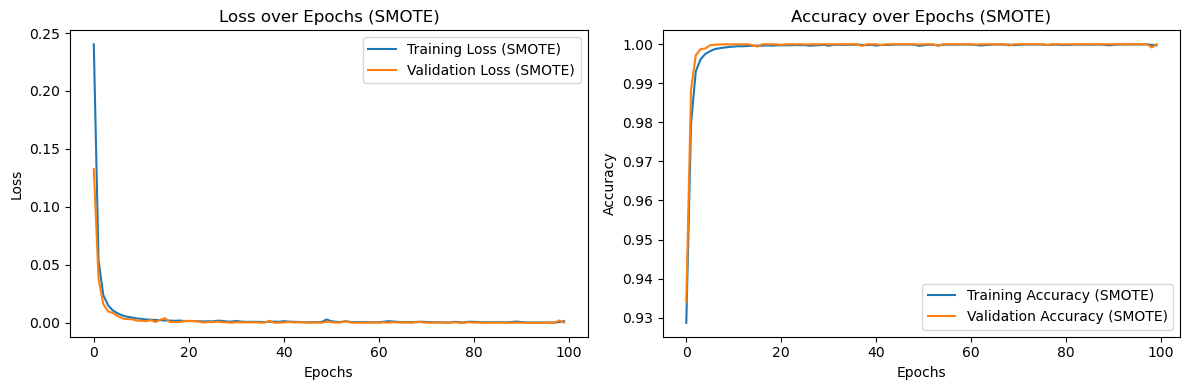

1781/1781 [==============================] - 2s 1ms/step

Resultados con SMOTE:
Matriz de Confusión:
[[56833    31]
 [   23    75]]

Precisión (Accuracy): 0.9990519995786665
Sensibilidad (Recall): 0.7653061224489796
Valor F1: 0.7352941176470589
Área bajo la curva ROC (AUC-ROC): 0.9244662165654106


In [27]:
# Aplicar SMOTE al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train_encoded)

# Convertir las etiquetas de clase a la forma correcta
y_train_resampled_correct_shape = to_categorical(y_train_resampled)

# Crear el modelo Sequential
model = Sequential()

# Agregar 4 capas ocultas con 20 neuronas cada una y activación relu
model.add(Dense(20, activation='relu', input_shape=(X_train_resampled.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))

# Agregar la capa de salida con función de activación sigmoid
model.add(Dense(2, activation='sigmoid'))

# Mostrar un resumen del modelo
model.build(input_shape=(None, X_train_resampled.shape[1]))
model.summary()

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con el conjunto de entrenamiento aumentado por SMOTE
history_smote = model.fit(X_train_resampled, y_train_resampled_correct_shape, epochs=100, batch_size=2048, validation_split=0.2, verbose=0)

# Obtener historial de pérdida y precisión
train_loss_smote = history_smote.history['loss']
val_loss_smote = history_smote.history['val_loss']
train_acc_smote = history_smote.history['accuracy']
val_acc_smote = history_smote.history['val_accuracy']

# Graficar pérdida durante el entrenamiento y la validación con SMOTE
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_smote, label='Training Loss (SMOTE)')
plt.plot(val_loss_smote, label='Validation Loss (SMOTE)')
plt.title('Loss over Epochs (SMOTE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión durante el entrenamiento y la validación con SMOTE
plt.subplot(1, 2, 2)
plt.plot(train_acc_smote, label='Training Accuracy (SMOTE)')
plt.plot(val_acc_smote, label='Validation Accuracy (SMOTE)')
plt.title('Accuracy over Epochs (SMOTE)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Mostrar los gráficos
plt.tight_layout()
plt.show()

# Realizar predicciones en el conjunto de prueba
y_pred_test_smote = model.predict(X_test_scaled)

# Convertir las probabilidades a clases (0 o 1)
y_pred_test_classes_smote = np.argmax(y_pred_test_smote, axis=1)

# Calcular la matriz de confusión
conf_matrix_smote = confusion_matrix(y_test, y_pred_test_classes_smote)

# Calcular la precisión
accuracy_smote = accuracy_score(y_test, y_pred_test_classes_smote)

# Calcular la sensibilidad (recall)
recall_smote = recall_score(y_test, y_pred_test_classes_smote)

# Calcular el valor F1
f1_smote = f1_score(y_test, y_pred_test_classes_smote)

# Calcular el área bajo la curva ROC (AUC-ROC)
roc_auc_smote = roc_auc_score(y_test, y_pred_test_smote[:, 1])

# Imprimir resultados con SMOTE
print("\nResultados con SMOTE:")
print("Matriz de Confusión:")
print(conf_matrix_smote)
print("\nPrecisión (Accuracy):", accuracy_smote)
print("Sensibilidad (Recall):", recall_smote)
print("Valor F1:", f1_smote)
print("Área bajo la curva ROC (AUC-ROC):", roc_auc_smote)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

- ¿Cuál es tu evaluación de los resultados obtenidos? ¿Consideras que este modelo es superior al anterior? ¿Podría considerarse como un modelo aceptable?
- Centrándonos en las variables predictoras, ¿qué estrategias crees que podrían aplicarse para mejorar la capacidad predictiva del modelo?
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>
    
1. Aunque el modelo creado, aplicando SMOTE, no tiene malas métricas observamos como muestra un rendimiento ligeramente inferior al modelo creado anteriormente (sin SMOTE). Este puede deberse a que los datos sintéticos creados por SMOTE no han proporcionado suficiente información valiosa para mejorar el modelo. En este caso en concreto nos quedaríamos con el modelo anterior que presenta mejores métricas.
2. Para tratar de mejorar la capacidad predictiva del modelo podríamos ajustar los hiperparámetros buscando aquellos que aumenten el rendimiento del mismo. Podríamos explorar diferentes números de capas, el número de neuronas por capa, el tipo de función de activación
que se debe usar en cada capa, el método de inicialización de pesos,etc. 

</div>

## 2.4. Ajuste de Hiperparámetros.

El ajuste de hiperparámetros es un proceso crucial en el entrenamiento de modelos de redes neuronales. Los hiperparámetros son configuraciones que no se aprenden automáticamente durante el entrenamiento, a diferencia de los pesos de las neuronas. En su lugar, debes ajustarlos manualmente para obtener un modelo óptimo.

Para realizar el ajuste de hiperparámetros en una red neuronal, sigue estos pasos:

1. Selecciona los hiperparámetros clave que deseas ajustar, como la tasa de aprendizaje, el número de capas ocultas, el número de neuronas en cada capa, la función de activación, etc.

2. Divide tus datos en conjuntos de entrenamiento, validación y prueba. El conjunto de validación se utiliza para evaluar el rendimiento de diferentes configuraciones de hiperparámetros.

3. Entrena tu modelo de red neuronal utilizando diferentes combinaciones de hiperparámetros en el conjunto de entrenamiento.

4. Evalúa el rendimiento del modelo en el conjunto de validación para cada conjunto de hiperparámetros.

5. Ajusta los hiperparámetros en función de los resultados en el conjunto de validación. Puedes utilizar técnicas como la búsqueda en cuadrícula o la optimización bayesiana para encontrar la mejor combinación de hiperparámetros.

6. Una vez que hayas encontrado los mejores hiperparámetros en el conjunto de validación, evalúa el rendimiento final del modelo en el conjunto de prueba para asegurarte de que generalice bien a datos no vistos.

Recuerda que el ajuste de hiperparámetros es un proceso iterativo y puede llevar tiempo, pero es esencial para obtener un modelo de redes neuronales con un buen rendimiento en tareas de data science. ¡Manos a la obra!

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>
    
- Para automatizar el proceso de búsqueda de parámetros, utiliza la función `GridSearchCV` de `sklearn.model_selection` y la función `KerasClassifier` de `scikeras.wrappers`
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [28]:
# División de datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar descriptores utilizando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Función para crear el modelo
def create_model(optimizer, activation, neurons=20, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation=activation, input_dim=X_train_scaled.shape[1]))
    
    for _ in range(hidden_layers):
        model.add(Dense(neurons, activation=activation))
    
    model.add(Dense(1, activation))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Crear el modelo KerasClassifier para usar con GridSearchCV
model = KerasClassifier(model=create_model, epochs=50, batch_size=128, verbose=0)

# Definir la cuadrícula de hiperparámetros para buscar
param_grid = {
    'model__optimizer': ['adam', 'rmsprop'],
    'model__activation': ['relu', 'sigmoid'],
    'model__neurons': [10, 20],
    'model__hidden_layers': [1, 2, 3],
}

# Especificar la métrica como 'recall' en la búsqueda
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(X_train_scaled, y_train)

# Mostrar los resultados de la búsqueda
print("Mejores Hiperparámetros encontrados:")
print(grid_result.best_params_)

Mejores Hiperparámetros encontrados:
{'model__activation': 'sigmoid', 'model__hidden_layers': 3, 'model__neurons': 20, 'model__optimizer': 'rmsprop'}


In [36]:
# Resultados del modelo con mejores hiperparámetros
best_mean = grid_result.best_score_
best_std = grid_result.cv_results_['std_test_score'][grid_result.best_index_]

print("\nMétricas con mejores hiperparámetros:")
print(f"Precisión: {best_mean:.4f} (Desviación estándar: {best_std:.4f})")

# Evaluar el modelo final en el conjunto de validación usando la sensibilidad y precisión
best_model = grid_result.best_estimator_
y_val_pred = best_model.predict(X_val_scaled)
val_recall = recall_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)

print(f"Sensibilidad: {val_recall:.4f}")


Métricas con mejores hiperparámetros:
Precisión: 0.9994 (Desviación estándar: 0.0001)
Sensibilidad: 0.7857


In [33]:
# Predecir las clases en el conjunto de validación
y_val_pred = best_model.predict(X_val_scaled)

# Obtener la matriz de confusión
conf_matrix = confusion_matrix(y_val, y_val_pred)

# Calcular la precisión
accuracy = accuracy_score(y_val, y_val_pred)

# Calcular la sensibilidad (recall)
recall = recall_score(y_val, y_val_pred)

# Calcular el valor F1
f1 = f1_score(y_val, y_val_pred)

# Calcular el área bajo la curva ROC (AUC-ROC)
y_val_pred_proba = best_model.predict_proba(X_val_scaled)[:, 1]
roc_auc = roc_auc_score(y_val, y_val_pred_proba)

# Mostrar
print(f'Matriz confusión:\n{conf_matrix}')
print(f'Precisión (Accuracy): {accuracy:.4f}')
print(f'Sensibilidad (Recall): {recall:.4f}')
print(f'Valor F1: {f1:.4f}')
print(f'Área bajo la curva ROC (AUC-ROC): {roc_auc:.4f}')

Matriz confusión:
[[56852    12]
 [   21    77]]
Precisión (Accuracy): 0.9994
Sensibilidad (Recall): 0.7857
Valor F1: 0.8235
Área bajo la curva ROC (AUC-ROC): 0.9720


**COMENTARIOS**

Aunque la precisión, el valor F1 y el área bajo la curva hayan obtenido mejores resultados en este modelo observamos como la sensibilidad se ha reducido ligeramente con respecto al primer modelo creado anteriormente. En este caso, puesto que nos interesa detectar el mayor porcentaje posible de fraudes escogeríamos el modelo anterior ya que tiene una mayor sensibilidad. El objetivo principal es detectar fraudes y minimizar los falsos negativos incluso si hay que asumir un mayor número de falsos positivos. Dicho esto, sería interesante realizar de nuevo el ajuste de hiperparámetros con el fin de encontrar el modelo con mejor sensibilidad, en lugar de "accuracy".

Mencionar también que, en el caso del modelo anterior, se ha optado por reducir el número de hiperparámetros, así como ajustar otros valores como epochs y batch_size, con el objetivo de lograr un tiempo de ejecución aceptable. El modelo anterior podría mejorarsese al explorar un espacio más amplio de hiperparámetr que debido a la limitación de tiempo de ejecución no ha sido posible en este caso.e.